In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


# Kaggle Survey Global Results

Many factors determine who we are in life, some of which are environmental/genetic and can never be changed, while others are within our power to determine for ourselves. What I've attempted to analyze in the Kaggle Survey is the relationships between gender, age, country, company, online academies, compensation, degree, and multiple data science tools to see how these factors affect each other. Some of these factors are unchangeable (country) but others are based on choice (online academies); my questions primarily focus on the relationship between gender and degree with other features.

The approach I used to analyze the Kaggle survey focused on combining up to 3 features which helped answer more complex questions . My main goal is to prove the obvious using data and to uncover trends or relationships that are not so obvious.

My analysis is focused on: 
1. Age and gender distribution 
2. Relationsip between programming languages used and degrees obtained 
3. Relationship between programming languages used and gender 
4. Distribution of countries Kagglers are located in and their gender
5. Relationship between Visualization tools used and the degree Kagglers have  obtained
6. Relationship between Kagglers assigned role at work, the degree they obtained, and their gender
7. Relationship between Online academies Kagglers attended and what ML models Kagglers use on a regular basis
8. The gender distribution across companies of different sizes
9. The gender distribution across companies of different sizes based on the degree they hold
10. Relationship between Degree obtained and the automation tool the Kaggler uses.
11. Relationship between Degree obtained, the number of years coding the Kaggler has been coding, and their compensation.
12. Gender distribution across salary ranges and the experience a Kaggler has in coding.

Thank you in advance for taking your time to read this!

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', low_memory = False)
pd.options.mode.chained_assignment = None
df.head()

Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                1838                        35-39   
2                              289287                        30-34   
3                                 860                        35-39   
4                                 507                        30-34   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                   Colombia   
2                   United States of America   
3                                  Argentina   
4                   United States of America   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                    Doctoral degree   
2                                    Master’s degree   
3                                  Bachelor’s degree   
4                                    Master’s degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                            Student   
2                                      Data Engineer   
3                                  Software Engineer   
4                                     Data Scientist   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   
2                                         5-10 years   
3                                        10-20 years   
4                                         5-10 years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   
2                                             Python   
3                                                NaN   
4                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   
2                                                  R   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_3  ...  \
0  What programming languages do you use on a reg...  ...   
1                                                SQL  ...   
2                                                SQL  ...   
3                                                NaN  ...   
4                                                SQL  ...   

                                        Q35_B_Part_2  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_3  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_4  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4              

Here is the first of the raw data from the survey.

The first thing I'm going to do is check out the age distribution for all Kagglers.

In [4]:
df_questions = pd.DataFrame(df.iloc[0])
df_questions = df_questions.transpose() #Sets Q1 and Q2 as columns on the questions dataframe
df_questions.head()

df.drop(0, inplace = True)
df['Q1'].value_counts()/df['Q1'].value_counts().sum()

25-29    0.200190
22-24    0.188960
18-21    0.173138
30-34    0.140297
35-39    0.099371
40-44    0.069724
45-49    0.049311
50-54    0.034837
55-59    0.020513
60-69    0.019864
70+      0.003793
Name: Q1, dtype: float64

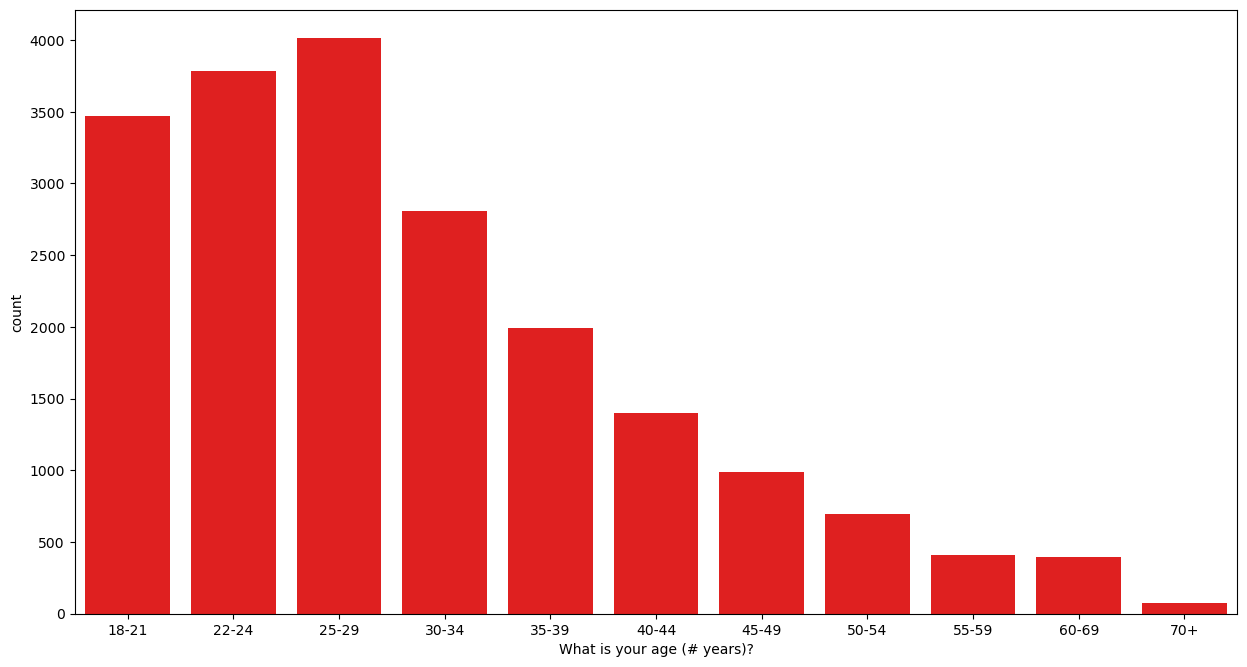

In [5]:
plt.figure(figsize=(15,8), dpi = 100)
ax = sns.countplot(x = 'Q1', data = df, color = 'red', order = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'])
ax.set(xlabel = df_questions['Q1'][0]);


In [6]:
#About 56% of respondents are people within the age of 18-29 indicating that younger people are the majority in this survey. The Countplot indicates the data is skewed to the right meaning that the older someone is, the less likely they are to be a Kaggler.

I'm going to check out the gender distribution based on age as well.

In [7]:
df['Q2'].value_counts()/df['Q2'].count()

Man                        0.788032
Woman                      0.193552
Prefer not to say          0.013126
Prefer to self-describe    0.002695
Nonbinary                  0.002595
Name: Q2, dtype: float64

In [8]:
#A majority of people who responded to the survey are men. An important note to keep in mind is that the percentage of anyone who is not male were sometimes too small for me to make an accurate conclusion.

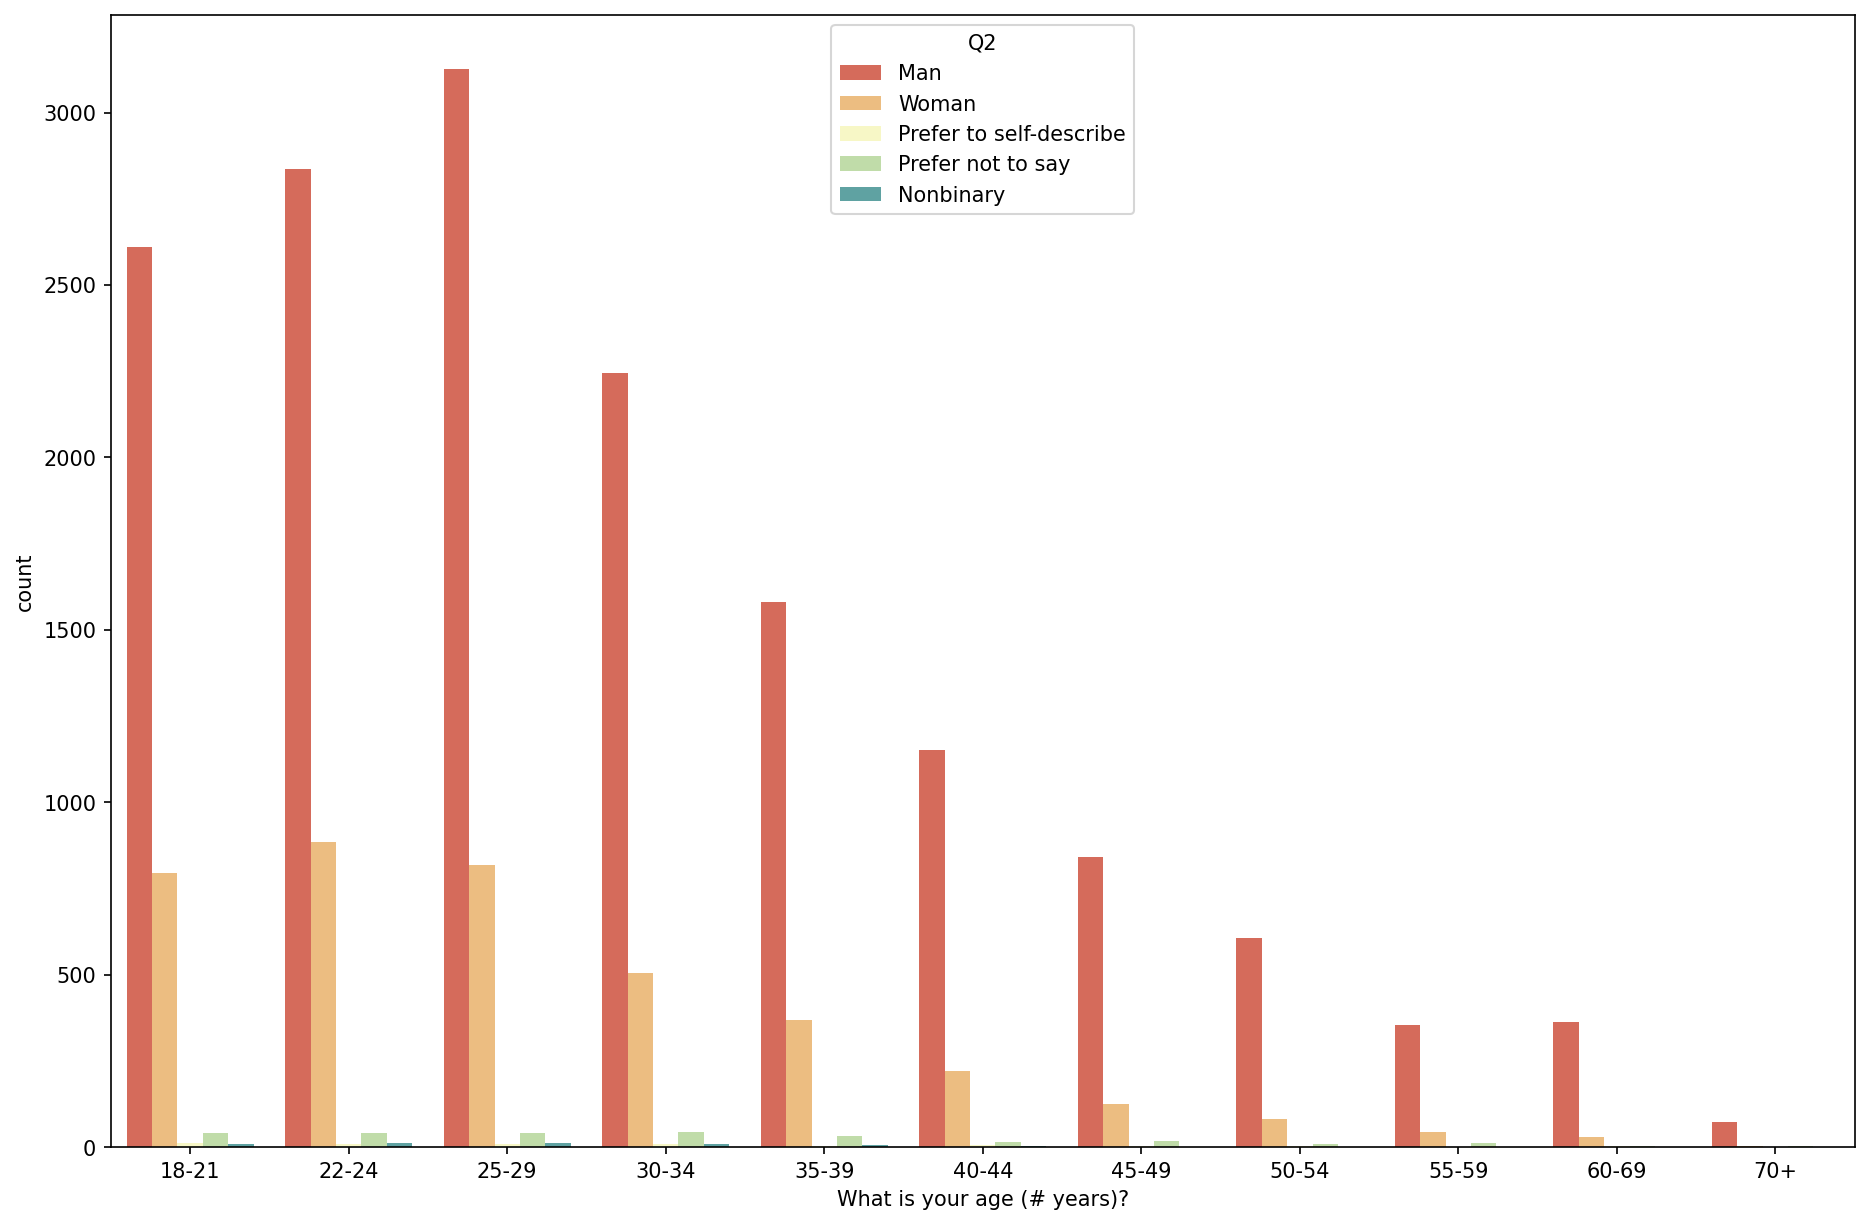

In [9]:
plt.figure(figsize=(15,10), dpi = 150)
ax = sns.countplot(x = 'Q1', data = df, color = 'red', hue = 'Q2', order = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'], palette = 'Spectral')
ax.set(xlabel = df_questions['Q1'][0]);

In [10]:
ag = df[['Q1', 'Q2']]
ag.columns = ['Age', 'Gender']
ages = pd.get_dummies(ag['Gender'])
ag = pd.concat([ag.drop('Gender', axis = 1), ages], axis = 1)

ag.groupby('Age').mean().transpose().round(3)

Age                      18-21  22-24  25-29  30-34  35-39  40-44  45-49  \
Man                      0.753  0.750  0.780  0.799  0.794  0.825  0.850   
Nonbinary                0.002  0.003  0.003  0.003  0.004  0.001  0.001   
Prefer not to say        0.012  0.011  0.010  0.016  0.017  0.011  0.017   
Prefer to self-describe  0.003  0.002  0.002  0.003  0.001  0.004  0.004   
Woman                    0.229  0.234  0.204  0.179  0.185  0.159  0.128   

Age                      50-54  55-59  60-69    70+  
Man                      0.867  0.859  0.910  0.947  
Nonbinary                0.000  0.000  0.003  0.000  
Prefer not to say        0.014  0.032  0.010  0.026  
Prefer to self-describe  0.003  0.000  0.005  0.000  
Woman                    0.116  0.109  0.073  0.026

In [11]:
#Data for the ages of females seems to be skewed to the right as well as shown by the countplot. Most females on Kagglers, however, seem to be within the age of 22 - 24 while men are mainly in the ages between 25 - 29. As the age of Kagglers starts to increase, the  percentage of males also increases making it a positive correlation between age and percentage of males. 

Here I analyze the programming language do people mainly use on Kaggle

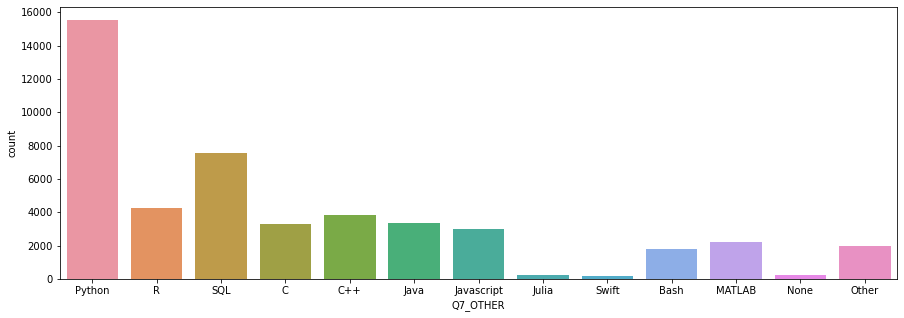

In [12]:
df_program = df[['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER']]
df_program = df_program.fillna('0')

plt.figure(figsize = (15,5))
for x in df_program.columns:
    sns.countplot(data = df_program, x=x, order=['Python', 'R', 'SQL', 'C', 'C++' ,'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other'])

In [13]:
#As expected most Kagglers use Python by far followed by SQL and R. These are primarily the programming languages that people use for data science.

Here I'm going to explore the relationship between programming languages used and the degree a Kaggler has obtained. First I'm going to break down the degrees by count.

In [14]:
def education(ed):
    if 'Some' in str(ed):
        return "College without Bachelor's degree"
    else:
        return str(ed)
df['Q4'] = df['Q4'].apply(education)


df_program.columns = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']
def numbers(stringer):
    if('0' in stringer):
        return 0
    else:
        return 1

for x in df_program.columns:
    df_program[x] = np.vectorize(numbers)(df_program[x])
    
df_program['degree'] = df['Q4'].copy()
degrees = df_program['degree'].value_counts()
dd = pd.concat([degrees, degrees/degrees.sum()], axis = 1)
dd.columns = ['Count', 'Percentage']
dd

Count  Percentage
Master’s degree                        7859    0.392244
Bachelor’s degree                      6978    0.348273
Doctoral degree                        2302    0.114893
College without Bachelor's degree      1092    0.054502
Professional degree                     699    0.034887
nan                                     467    0.023308
I prefer not to answer                  399    0.019914
No formal education past high school    240    0.011978

In [15]:
 #Nearly 75% of Kagglers have Masters or Bachelors degrees.

In [16]:
grouped_programs = df_program.groupby(by = 'degree').sum()
df_program.groupby(by = 'degree').sum()

Python     R   SQL     C   C++  Java  \
degree                                                                       
Bachelor’s degree                       5626  1075  2589  1470  1646  1363   
College without Bachelor's degree        826   133   341   213   273   228   
Doctoral degree                         1834   717   720   372   445   315   
I prefer not to answer                   255    52   112    62    68    56   
Master’s degree                         6342  2123  3405  1077  1253  1264   
No formal education past high school     148    22    71    24    31    30   
Professional degree                      499   155   297    97   111   111   
nan                                        0     0     0     0     0     0   

                                      Javascript  Julia  Swift  Bash  MATLAB  \
degree                                                                         
Bachelor’s degree                           1218     64     63   471     611   
College without Bachelor's degree            230     13     21    83      74   
Doctoral degree                              243     61     16   358     533   
I prefer not to answer                        62      6      5    21      32   
Master’s degree                             1081    104     86   762     883   
No formal education past high school          44      3      1    24      10   
Professional degree                          117     11      6    57      74   
nan                                            0      0      0     0       0   

                                      None  Other  
degree                                             
Bachelor’s degree                       82    582  
College without Bachelor's degree       17    118  
Doctoral degree                         11    255  
I prefer not to answer                   7     39  
Master’s degree                         83    834  
No formal education past high school     2     23  
Professional degree                      4     94  
nan                                      0      0

In [17]:
#Amount of Kagglers who have used these programming languages based on their degree

In [18]:
df_program.groupby('degree').mean().round(3)

Python      R    SQL      C    C++  \
degree                                                                     
Bachelor’s degree                      0.806  0.154  0.371  0.211  0.236   
College without Bachelor's degree      0.756  0.122  0.312  0.195  0.250   
Doctoral degree                        0.797  0.311  0.313  0.162  0.193   
I prefer not to answer                 0.639  0.130  0.281  0.155  0.170   
Master’s degree                        0.807  0.270  0.433  0.137  0.159   
No formal education past high school   0.617  0.092  0.296  0.100  0.129   
Professional degree                    0.714  0.222  0.425  0.139  0.159   
nan                                    0.000  0.000  0.000  0.000  0.000   

                                       Java  Javascript  Julia  Swift   Bash  \
degree                                                                         
Bachelor’s degree                     0.195       0.175  0.009  0.009  0.067   
College without Bachelor's degree     0.209       0.211  0.012  0.019  0.076   
Doctoral degree                       0.137       0.106  0.026  0.007  0.156   
I prefer not to answer                0.140       0.155  0.015  0.013  0.053   
Master’s degree                       0.161       0.138  0.013  0.011  0.097   
No formal education past high school  0.125       0.183  0.012  0.004  0.100   
Professional degree                   0.159       0.167  0.016  0.009  0.082   
nan                                   0.000       0.000  0.000  0.000  0.000   

                                      MATLAB   None  Other  
degree                                                      
Bachelor’s degree                      0.088  0.012  0.083  
College without Bachelor's degree      0.068  0.016  0.108  
Doctoral degree                        0.232  0.005  0.111  
I prefer not to answer                 0.080  0.018  0.098  
Master’s degree                        0.112  0.011  0.106  
No formal education past high school   0.042  0.008  0.096  
Professional degree                    0.106  0.006  0.134  
nan                                    0.000  0.000  0.000

In [19]:
#Mean values of Kagglers who have used these programming languages based on their degree

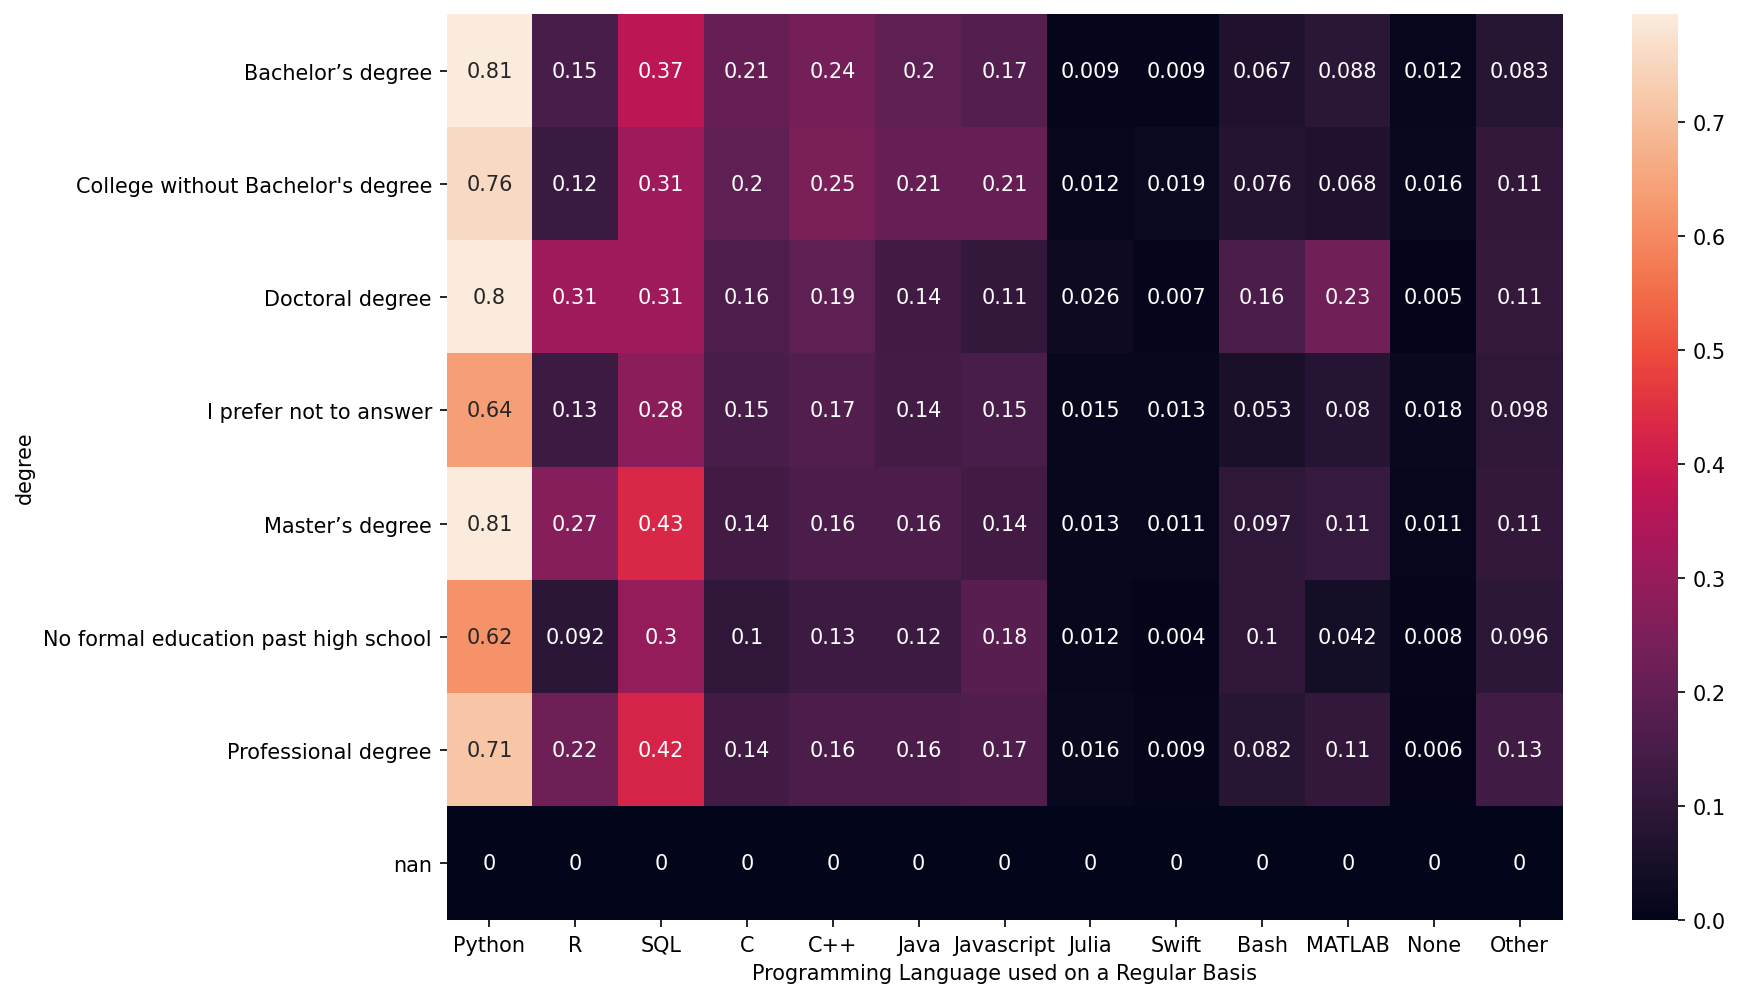

In [20]:
plt.figure(figsize = (12,8), dpi = 150)
ax = sns.heatmap(df_program.groupby('degree').mean().round(3), annot=True, robust = True)
ax.set(xlabel = 'Programming Language used on a Regular Basis');

In [21]:
#The above heatmap and table of the means shows the coding languages that people use based off their degree (adding the row will give you 100%)

#Seems like no matter what degree a Kaggler has, Python is still the most used programming language. Nearly 70% of respondents regardless of degree have used Python 

#This heatmap also shows that the likelihood of Kagglers using R increases with a higher University degree, R was also highly in usage among those with Professional degrees

#Many Kagglers with Doctoral degrees tend to use MATLAB and Bash more than any other degree, a bit of an outlier compared to other percentages for MATLAB and Bash

So Python, SQL, and R are clearly the most famous programming languages on Kaggle, but does the use of these programming languages differ based on gender?

In [22]:
df_genders = df_program.drop('degree', axis = 1).copy() 
df_genders['gender'] = df['Q2']

df_genders.groupby('gender').sum()

Python     R   SQL     C   C++  Java  Javascript  \
gender                                                                      
Man                       12530  3299  5940  2552  3063  2641        2487   
Nonbinary                    41    14    20     8    10     1           6   
Prefer not to say           182    48    97    36    43    42          41   
Prefer to self-describe      41     8    18    12    13     9          12   
Woman                      2736   908  1460   707   698   674         449   

                         Julia  Swift  Bash  MATLAB  None  Other  
gender                                                            
Man                        238    171  1561    1679   149   1634  
Nonbinary                    1      2    10       7     0      7  
Prefer not to say            5      4    31      28     6     31  
Prefer to self-describe      2      1    10       6     0      7  
Woman                       16     20   164     497    51    266

In [23]:
#Mean of Kagglers who use these programming languages based on their gender

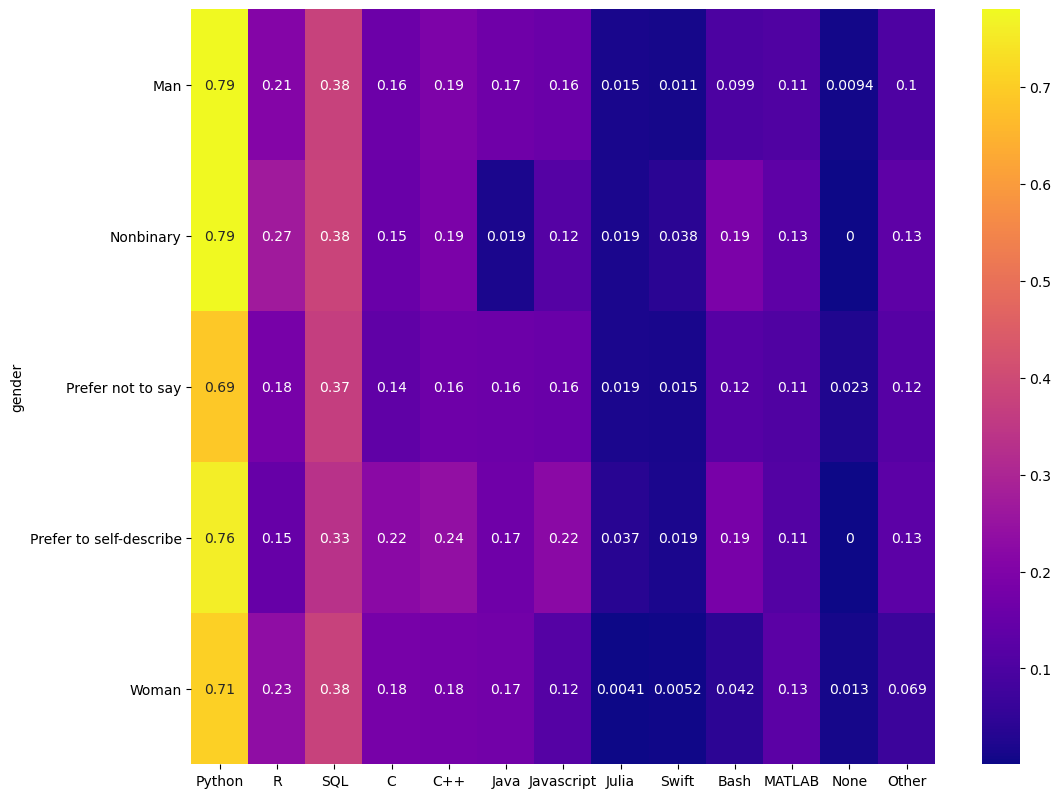

In [24]:
plt.figure(figsize = (12,10), dpi = 100)
sns.heatmap(df_genders.groupby('gender').mean(), cmap = 'plasma', robust = True, annot = True);

In [25]:
#Regardless of gender, Python is still the most widely used progamming language followed by SQL and R. The breakdown between the 3 programming languages for male and female are nearly identical

Here, I'm going to analyze the number of Kagglers by country and gender.

In [26]:
df_countries = pd.DataFrame()
df_countries['country'] = df['Q3'].copy() 
df_countries['gender'] = df['Q2'].copy() #We'll use this later

df_countries['country'].value_counts() 

India                                                   5851
United States of America                                2237
Other                                                   1388
Brazil                                                   694
Japan                                                    638
Russia                                                   582
United Kingdom of Great Britain and Northern Ireland     489
Nigeria                                                  476
China                                                    474
Germany                                                  404
Turkey                                                   344
Spain                                                    336
France                                                   330
Canada                                                   301
Indonesia                                                290
Pakistan                                                 283
Italy                   

In [27]:
#A significantly high amount of people from India and U.S. but also 'Other'.

In [28]:
genders = pd.get_dummies(df_countries['gender'])
df_countries = pd.concat([df_countries, genders], axis = 1)

country_genders = df_countries.drop('gender', axis = 1).groupby('country').sum().copy()

country_genders[(country_genders['Man'] > country_genders['Man'].quantile(0.8)) | (country_genders['Woman'] > country_genders['Woman'].quantile(0.8)) | (country_genders['Nonbinary'] > country_genders['Nonbinary'].quantile(0.8))] 

Man  Nonbinary  \
country                                                                 
Australia                                            182.0        2.0   
Brazil                                               599.0        1.0   
Canada                                               225.0        0.0   
China                                                388.0        3.0   
Germany                                              326.0        1.0   
India                                               4491.0        2.0   
Indonesia                                            203.0        2.0   
Japan                                                590.0        0.0   
Mexico                                               191.0        2.0   
Nigeria                                              392.0        1.0   
Other                                               1092.0        8.0   
Russia                                               491.0        3.0   
Spain                                                288.0        0.0   
Turkey                                               249.0        2.0   
United Kingdom of Great Britain and Northern Ir...   386.0        3.0   
United States of America                            1680.0       18.0   

                                                    Prefer not to say  \
country                                                                 
Australia                                                         7.0   
Brazil                                                            1.0   
Canada                                                            5.0   
China                                                            11.0   
Germany                                                           9.0   
India                                                            56.0   
Indonesia                                                         5.0   
Japan                                                             6.0   
Mexico                                                            1.0   
Nigeria                                                           2.0   
Other                                                            38.0   
Russia                                                            6.0   
Spain                                                             3.0   
Turkey                                                            5.0   
United Kingdom of Great Britain and Northern Ir...                7.0   
United States of America                                         50.0   

                                                    Prefer to self-describe  \
country                                                                       
Australia                                                               2.0   
Brazil                                                                  0.0   
Canada                                                                  0.0   
China                                                                   3.0   
Germany                                                                 2.0   
India                                                                  13.0   
Indonesia                                                               1.0   
Japan                                                                   0.0   
Mexico                                                                  0.0   
Nigeria                                                                 0.0   
Other                                                                   9.0   
Russia                                                                  2.0   
Spain                                                                   1.0   
Turkey                                                                  1.0   
United Kingdom of Great Britain and Northern Ir...                      2.0   
United States of America                                                6.0   

  

In [29]:
#Most Woman seem to be from India, Other, and US, same with men. Most people who are non-binary are from the US and Other.

In [30]:
df_countries.drop('gender', axis = 1).groupby('country').mean()

Man  Nonbinary  \
country                                                                   
Argentina                                           0.828358   0.000000   
Australia                                           0.787879   0.008658   
Bangladesh                                          0.825175   0.000000   
Belarus                                             0.779661   0.000000   
Belgium                                             0.833333   0.000000   
Brazil                                              0.863112   0.001441   
Canada                                              0.747508   0.000000   
Chile                                               0.894118   0.000000   
China                                               0.818565   0.006329   
Colombia                                            0.875706   0.000000   
Egypt                                               0.759777   0.000000   
France                                              0.815152   0.000000   
Germany                                             0.806931   0.002475   
Ghana                                               0.846154   0.000000   
Greece                                              0.873874   0.000000   
India                                               0.767561   0.000342   
Indonesia                                           0.700000   0.006897   
Iran, Islamic Republic of...                        0.623457   0.000000   
Ireland                                             0.648148   0.018519   
Israel                                              0.814433   0.000000   
Italy                                               0.883895   0.000000   
Japan                                               0.924765   0.000000   
Kenya                                               0.797386   0.000000   
Malaysia                                            0.593985   0.007519   
Mexico                                              0.841410   0.008811   
Morocco                                             0.781955   0.000000   
Nepal                                               0.838710   0.000000   
Netherlands                                         0.814570   0.000000   
Nigeria                                             0.823529   0.002101   
Other                                               0.786744   0.005764   
Pakistan                                            0.830389   0.000000   
Peru                                                0.842105   0.000000   
Philippines                                         0.656566   0.010101   
Poland                                              0.810811   0.000000   
Portugal                                            0.737705   0.000000   
Republic of Korea                                   0.921053   0.000000   
Romania                                             0.786885   0.000000   
Russia                                              0.843643   0.005155   
Saudi Arabia                                        0.723684   0.000000   
Singapore                                           0.724832   0.000000   
South Africa                                        0.794326   0.000000   
South Korea                                         0.789474   0.000000   
Spain                                               0.857143   0.000000   
Sri Lanka                                           0.694444   0.000000   
Sweden                                              0.807692   0.000000   
Switzerland                                         0.823529   0.000000   
Taiwan                                              0.760300   0.003745   
Thailand                                            0.742424   0.000000   
Tunisia                                             0.626263   0.000000   
Turkey                                              0.723837   0.005814   
Ukraine                                             0.852941   0.000000   
United Arab Emirates                                0.796610   0.000000   
United 

In [31]:
df_countries.drop('gender', axis = 1).groupby('country').mean()['Woman'].nlargest(5)

country
Malaysia                        0.383459
Tunisia                         0.373737
Iran, Islamic Republic of...    0.364198
Ireland                         0.314815
Sri Lanka                       0.305556
Name: Woman, dtype: float64

In [32]:
#Countries with the largest percentage of Women respondents

In [33]:
df_countries.drop('gender', axis = 1).groupby('country').mean()['Woman'].nsmallest(5)

country
Japan                0.065831
Republic of Korea    0.078947
Chile                0.094118
Greece               0.108108
Italy                0.108614
Name: Woman, dtype: float64

In [34]:
#Countries with the lowest percentage of Women respondents

In [35]:
#This is the mean of genders in every country (Adding the row will give you 100%)

#Surprisingly many industrialized countries such as Republic of Korea, Russia, Spain, Japan, Italy, Australia, Brazil, Beligum, France, and Germany have a far lower percentage of female Kagglers averaging around 14%

#Countries such as the USA, United Arab Emirates, Turkey, Thailand, Taiwan, Saudi Arabia, Portugual, and India each have around 20% of female Kagglers

#By far the lowest percentage of female Kagglers were in Japan, Republic of Korea, Chile, Greece, and Italy averaging about 8%

#Meanwhile emerging countries such as Malaysia, Tunisia, Iran, and Sri Lanka each have higher than 30% Kagglers that are female

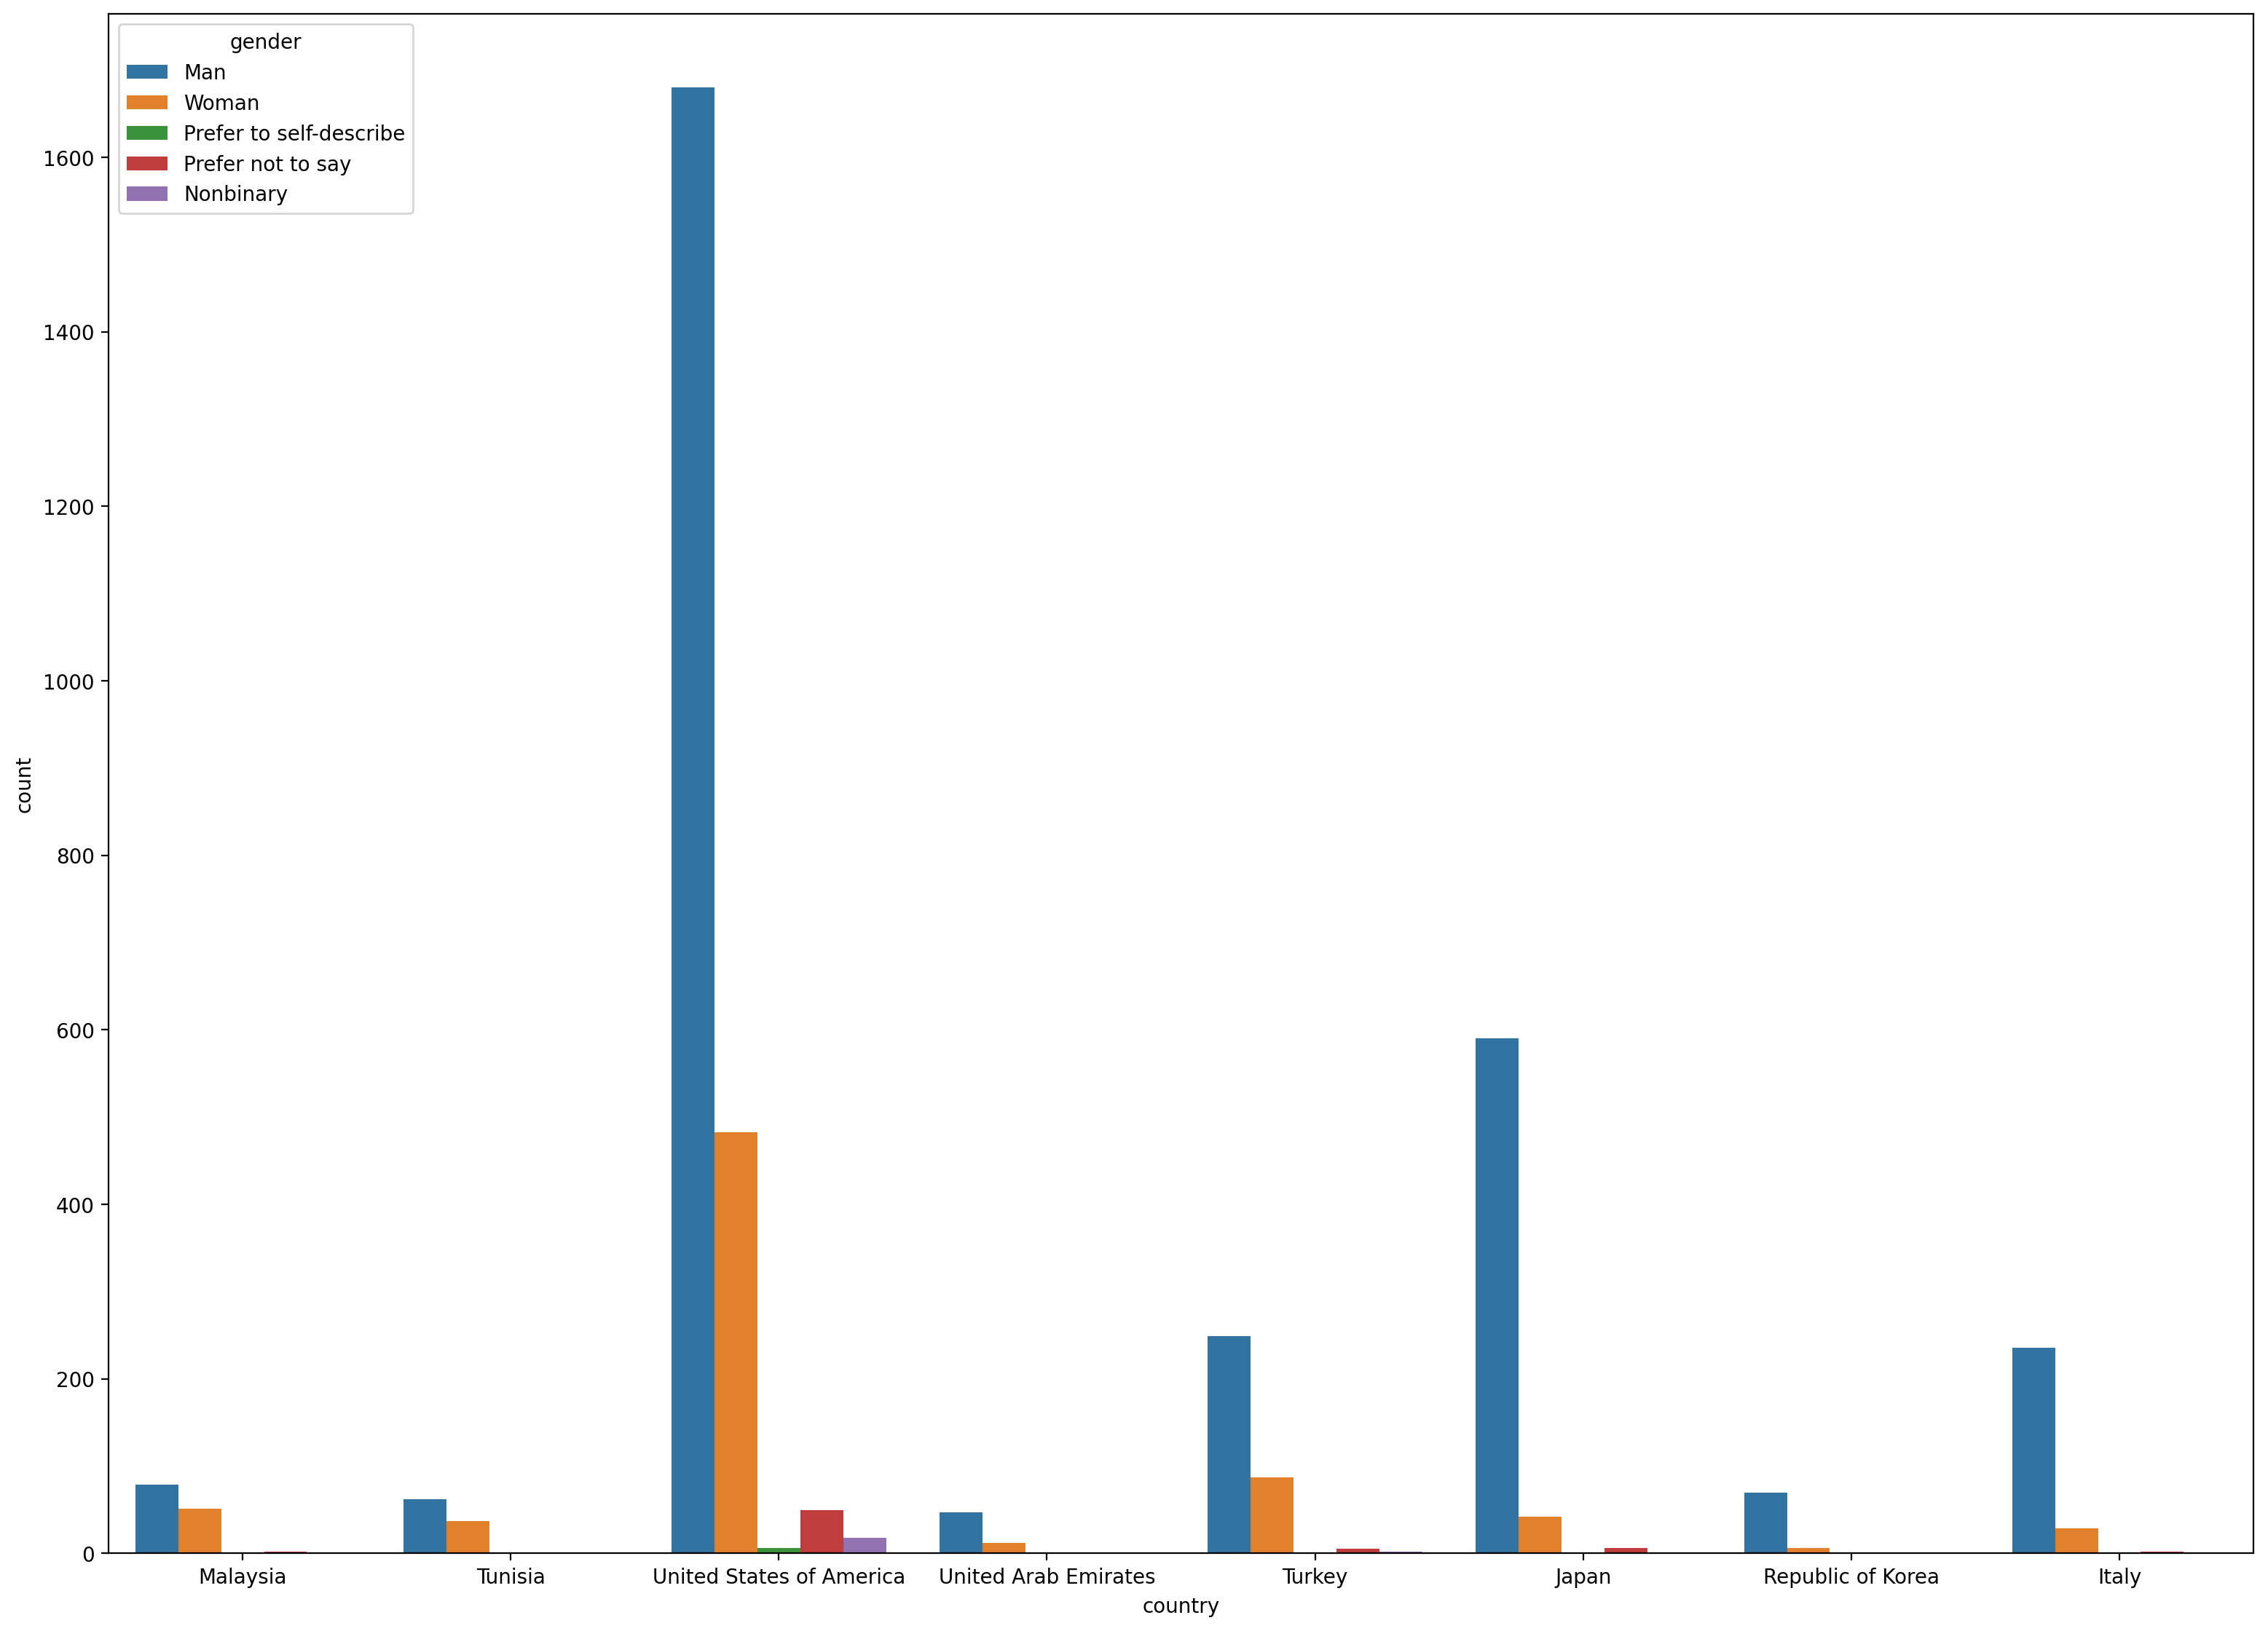

In [36]:
plt.figure(figsize=(19,14), dpi = 200)
sns.countplot(data = df_countries, x = 'country', hue = 'gender', order = ['Malaysia', 'Tunisia', 'United States of America', 'United Arab Emirates','Turkey', 'Japan', 'Republic of Korea', 'Italy']);

> Here we explore the relationship between degree obtained and the frequency of usage of ML libraries.

In [37]:
visualizes = [col for col in df.columns if 'Q14' in col]
df_visualization = pd.DataFrame()
df_visualization = pd.concat([df['Q4'], df[visualizes]], axis = 1)

grouped_visualizations = df_visualization.copy()
grouped_visualizations.columns = ['Degree','Matplotlib', 'Seaborn', 'Plotly', 'Ggplot', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'None', 'Other']

grouped_visualizations.groupby('Degree').count().transpose().apply(lambda x: round(x/x.sum(), 3)).transpose()

Matplotlib  Seaborn  Plotly  Ggplot  \
Degree                                                                      
Bachelor’s degree                          0.358    0.264   0.106   0.091   
College without Bachelor's degree          0.364    0.247   0.093   0.069   
Doctoral degree                            0.326    0.208   0.115   0.145   
I prefer not to answer                     0.344    0.233   0.119   0.078   
Master’s degree                            0.326    0.236   0.121   0.128   
No formal education past high school       0.350    0.213   0.083   0.065   
Professional degree                        0.321    0.227   0.122   0.113   
nan                                          NaN      NaN     NaN     NaN   

                                      Shiny  D3 js  Altair  Bokeh  Geoplotlib  \
Degree                                                                          
Bachelor’s degree                     0.019  0.020   0.006  0.022       0.024   
College without Bachelor's degree     0.013  0.026   0.008  0.019       0.019   
Doctoral degree                       0.045  0.023   0.008  0.033       0.023   
I prefer not to answer                0.017  0.019   0.009  0.021       0.026   
Master’s degree                       0.038  0.024   0.006  0.026       0.022   
No formal education past high school  0.025  0.032   0.007  0.025       0.022   
Professional degree                   0.041  0.024   0.004  0.029       0.032   
nan                                     NaN    NaN     NaN    NaN         NaN   

                                      Leaflet / Folium   None  Other  
Degree                                                                
Bachelor’s degree                                0.016  0.061  0.013  
College without Bachelor's degree                0.018  0.107  0.018  
Doctoral degree                                  0.018  0.034  0.022  
I prefer not to answer                           0.009  0.108  0.017  
Master’s degree                                  0.017  0.041  0.015  
No formal education past high school             0.025  0.126  0.025  
Professional degree                              0.010  0.058  0.019  
nan                                                NaN    NaN    NaN

In [38]:
#Percentage of Kagglers that use the visualization tools based on the degree they have (rows add to 1).

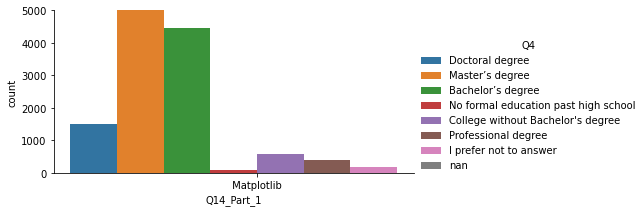

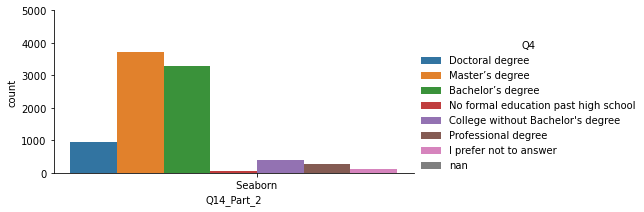

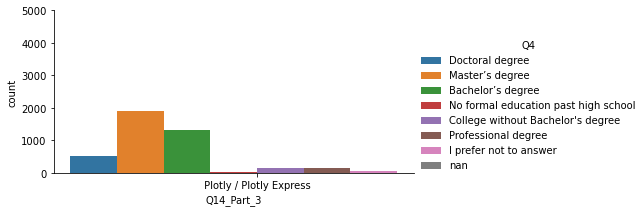

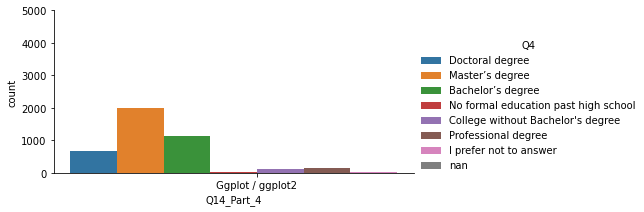

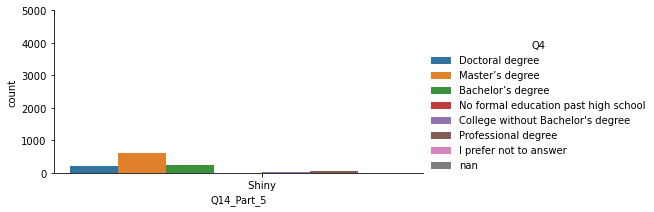

In [39]:
df_visualization.drop('Q4', axis = 1).fillna('Not_Used', inplace = True)

for x in df_visualization.columns[1:6]:
    ax = sns.catplot(data = df_visualization, x = x,  kind = 'count', hue = 'Q4', height = 3, aspect = 2)
    ax.set(ylim = (0,5000));


In [40]:
#Based on the above charts, usage of various ML libraries seems to be consistent across all respondents regardless of the degree the obtained, with the most poplar being Matplotlib and Seaborn.

Now I'm going to compare how the degree Kagglers have and their gender affect the role they play at work.

In [41]:
df_roles = df[['Q4', 'Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 'Q23_OTHER', 'Q2']]

#Going to shorten gender by changing it to male, female, other so the data looks better
def genders(gender):
    if(('Man' in gender) or ('Woman' in gender)):
        return gender
    else:
        return 'Other'
df_roles['Q2'] = df_roles['Q2'].apply(genders)

df_roles.columns = ['Degree', 'Analyze and Understand data', 'Build or Run data infrastructure', 'Apply Machine learning to new areas', 'Machine learning to improve product', 'Experimentation to improve esxisting ML models', 'Research to advance ML', 'None', 'Other', 'Gender']
questions = df_roles.groupby(by = ['Degree', 'Gender']).count()

In [42]:
round(questions.xs('Man', level = 1, axis = 0)/15789, 4)*100

Analyze and Understand data  \
Degree                                                              
Bachelor’s degree                                            9.34   
College without Bachelor's degree                            1.15   
Doctoral degree                                              4.71   
I prefer not to answer                                       0.42   
Master’s degree                                             16.49   
No formal education past high school                         0.29   
Professional degree                                          1.34   
nan                                                          0.00   

                                      Build or Run data infrastructure  \
Degree                                                                   
Bachelor’s degree                                                 5.09   
College without Bachelor's degree                                 0.72   
Doctoral degree                                                   2.31   
I prefer not to answer                                            0.16   
Master’s degree                                                   8.35   
No formal education past high school                              0.11   
Professional degree                                               0.68   
nan                                                               0.00   

                                      Apply Machine learning to new areas  \
Degree                                                                      
Bachelor’s degree                                                    5.14   
College without Bachelor's degree                                    0.61   
Doctoral degree                                                      4.63   
I prefer not to answer                                               0.17   
Master’s degree                                                     10.61   
No formal education past high school                                 0.15   
Professional degree                                                  0.72   
nan                                                                  0.00   

                                      Machine learning to improve product  \
Degree                                                                      
Bachelor’s degree                                                    3.88   
College without Bachelor's degree                                    0.46   
Doctoral degree                                                      2.43   
I prefer not to answer                                               0.15   
Master’s degree                                                      7.15   
No formal education past high school                                 0.11   
Professional degree                                                  0.38   
nan                                                                  0.00   

                                      Experimentation to improve esxisting ML models  \
Degree                                                                                 
Bachelor’s degree                                                               4.15   
College without Bachelor's degree                                               0.46   
Doctoral degree                                                                 3.55   
I prefer not to answer                                                          0.16   
Master’s degree                                                                 7.84   
No formal education past high school                                            0.11   
Professional degree                                                             0.58   
nan                                                                             0.00   

                                      Research to advance ML  None  Other  
Degree                                                                     
Bachelor’s degree              

In [43]:
#Men's tasks based on degree

In [44]:
round(questions.xs('Woman', level = 1, axis = 0)/3878, 4)*100

Analyze and Understand data  \
Degree                                                              
Bachelor’s degree                                            6.83   
College without Bachelor's degree                            0.52   
Doctoral degree                                              4.07   
I prefer not to answer                                       0.21   
Master’s degree                                             12.87   
No formal education past high school                         0.05   
Professional degree                                          1.01   
nan                                                          0.00   

                                      Build or Run data infrastructure  \
Degree                                                                   
Bachelor’s degree                                                 3.66   
College without Bachelor's degree                                 0.28   
Doctoral degree                                                   1.81   
I prefer not to answer                                            0.05   
Master’s degree                                                   6.88   
No formal education past high school                              0.00   
Professional degree                                               0.44   
nan                                                               0.00   

                                      Apply Machine learning to new areas  \
Degree                                                                      
Bachelor’s degree                                                    2.27   
College without Bachelor's degree                                    0.10   
Doctoral degree                                                      2.89   
I prefer not to answer                                               0.15   
Master’s degree                                                      5.96   
No formal education past high school                                 0.00   
Professional degree                                                  0.44   
nan                                                                  0.00   

                                      Machine learning to improve product  \
Degree                                                                      
Bachelor’s degree                                                    2.35   
College without Bachelor's degree                                    0.15   
Doctoral degree                                                      1.65   
I prefer not to answer                                               0.10   
Master’s degree                                                      5.23   
No formal education past high school                                 0.00   
Professional degree                                                  0.28   
nan                                                                  0.00   

                                      Experimentation to improve esxisting ML models  \
Degree                                                                                 
Bachelor’s degree                                                               1.88   
College without Bachelor's degree                                               0.05   
Doctoral degree                                                                 2.58   
I prefer not to answer                                                          0.10   
Master’s degree                                                                 5.39   
No formal education past high school                                            0.00   
Professional degree                                                             0.28   
nan                                                                             0.00   

                                      Research to advance ML  None  Other  
Degree                                                                     
Bachelor’s degree              

In [45]:
#Women's task based on degree

In [46]:
#Tables show percentage of total Men/Women that has been asked to perfrom this task based on their degree

#Above table shows percentage of men/women who have been assigned to perform one or more types of tasks based on the degree they obtained. It’s clear that the percentage of women assigned to perform any of the tasks was constantly lower than that of men’s.

#One interesting observation is the percentage of kagglers, albeit being fairly small, who had no formal education past high school, yet were asked to work on advanced tasks such as research to advance ML.

Now I will show how the online academy people take affect what ML model Kagglers use on a regular basis

In [47]:
course_algo = df[['Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q37_Part_1', 'Q37_Part_3', 'Q37_Part_4', 'Q37_Part_7', 'Q37_Part_10']]
#Many different types of courses and algorithms so I'm just going to focus on the more gamous ones such as ones on Kaggle, Coursera, etc. and later replace them with other


course_algo.columns = ['Regression', 'Trees_Forests', 'Boosting_GBM', 'Bayesian', 'Evolutionary', 'DenseNeural', 'ConvolutionNeural', 'Generative_Adversarial', 'Recurrent_Neural', 'Transformer_Networks', 'Coursera', 'Kaggle', 'DataCamp', 'Udemy', 'University']

def nulls(value1, value2, value3, value4, value5):
    if(value1 and value2 and value3 and value4 and value5 == True ):
        return 1
    else:
        return np.NaN

course_algo['Other_Course'] = np.vectorize(nulls)(course_algo['Coursera'].isnull(), course_algo['Kaggle'].isnull(), course_algo['DataCamp'].isnull(), course_algo['Udemy'].isnull(), course_algo['University'].isnull())


def others(other):
    if(other == 1):
        return 'Other'
    else:
        return other

course_algo['Other_Course'] = course_algo['Other_Course'].apply(others)

def shortener(word):
    if('University' in str(word)):
        return 'University Courses'
    else:
        return word
course_algo['University'] = course_algo['University'].apply(shortener)

In [48]:
dt = pd.DataFrame()
dt = course_algo.fillna(0)
def All_Courses(value1, value2, value3, value4, value5, value6):
    x = ""
    if(value1 != 0):
        x+= str(value1) + ', '
    if(value2 != 0):
        x+= str(value2) + ', '
    if(value3 != 0):
        x+= str(value3) + ', '
    if(value4 != 0):
        x+= str(value4) + ', '
    if(value5 != 0):
        x+= str(value5) + ', '
    if(value6 != 0):
        x+= str(value6) + ', '
    return x[:-2]

course_algo['Courses'] = dt[['Coursera', 'Kaggle', 'DataCamp', 'Udemy', 'University', 'Other_Course']].apply(lambda dt: All_Courses(dt['Coursera'], dt['Kaggle'], dt['DataCamp'], dt['Udemy'], dt['University'], dt['Other_Course']), axis = 1 )

course_algo['Courses'].value_counts()

Other                                                                  8529
Coursera                                                               1649
Coursera, Kaggle Learn Courses                                          916
University Courses                                                      855
Coursera, Udemy                                                         842
Kaggle Learn Courses                                                    750
Udemy                                                                   729
Coursera, University Courses                                            581
Coursera, Kaggle Learn Courses, Udemy                                   557
Coursera, Kaggle Learn Courses, DataCamp, Udemy                         407
Coursera, DataCamp                                                      360
Kaggle Learn Courses, Udemy                                             344
Coursera, DataCamp, Udemy                                               331
Coursera, Ka

In [49]:
#There seems to be a lot of people that took multiple online academies such as 'Coursera and kaggle' or 'Coursera and Udemy'. 

#Coursera definetely seems to be one of the popular courses, however, being taken with many other courses and on its own.

In [50]:
Course_and_algo = course_algo.groupby('Courses')[['Regression', 'Trees_Forests', 'Boosting_GBM', 'Bayesian', 'Evolutionary', 'DenseNeural', 'ConvolutionNeural', 'Generative_Adversarial', 'Recurrent_Neural', 'Transformer_Networks']].count().transpose()
Course_and_algo.apply(lambda x: round(x/x.sum(), 3)).transpose().head()

Regression  Trees_Forests  \
Courses                                                                    
Coursera                                            0.233          0.175   
Coursera, DataCamp                                  0.256          0.212   
Coursera, DataCamp, Udemy                           0.254          0.221   
Coursera, DataCamp, Udemy, University Courses       0.238          0.202   
Coursera, DataCamp, University Courses              0.238          0.207   

                                               Boosting_GBM  Bayesian  \
Courses                                                                 
Coursera                                              0.110     0.075   
Coursera, DataCamp                                    0.139     0.085   
Coursera, DataCamp, Udemy                             0.131     0.093   
Coursera, DataCamp, Udemy, University Courses         0.141     0.097   
Coursera, DataCamp, University Courses                0.142     0.107   

                                               Evolutionary  DenseNeural  \
Courses                                                                    
Coursera                                              0.016        0.082   
Coursera, DataCamp                                    0.012        0.069   
Coursera, DataCamp, Udemy                             0.014        0.061   
Coursera, DataCamp, Udemy, University Courses         0.018        0.061   
Coursera, DataCamp, University Courses                0.020        0.072   

                                               ConvolutionNeural  \
Courses                                                            
Coursera                                                   0.155   
Coursera, DataCamp                                         0.109   
Coursera, DataCamp, Udemy                                  0.111   
Coursera, DataCamp, Udemy, University Courses              0.111   
Coursera, DataCamp, University Courses                     0.098   

                                               Generative_Adversarial  \
Courses                                                                 
Coursera                                                        0.027   
Coursera, DataCamp                                              0.016   
Coursera, DataCamp, Udemy                                       0.021   
Coursera, DataCamp, Udemy, University Courses                   0.014   
Coursera, DataCamp, University Courses                          0.022   

                                               Recurrent_Neural  \
Courses                                                           
Coursera                                                  0.091   
Coursera, DataCamp                                        0.069   
Coursera, DataCamp, Udemy                                 0.064   
Coursera, DataCamp, Udemy, University Courses             0.087   
Coursera, DataCamp, University Courses                    0.070   

                                               Transformer_Networks  
Courses                                                              
Coursera                                                      0.037  
Coursera, DataCamp                                            0.035  
Coursera, DataCamp, Udemy                                     0.029  
Coursera, DataCamp, Udemy, University Courses                 0.030  
Coursera, DataCamp, University Courses                        0.024

In [51]:
#In this table, every row adds up to 1 (or 100%)

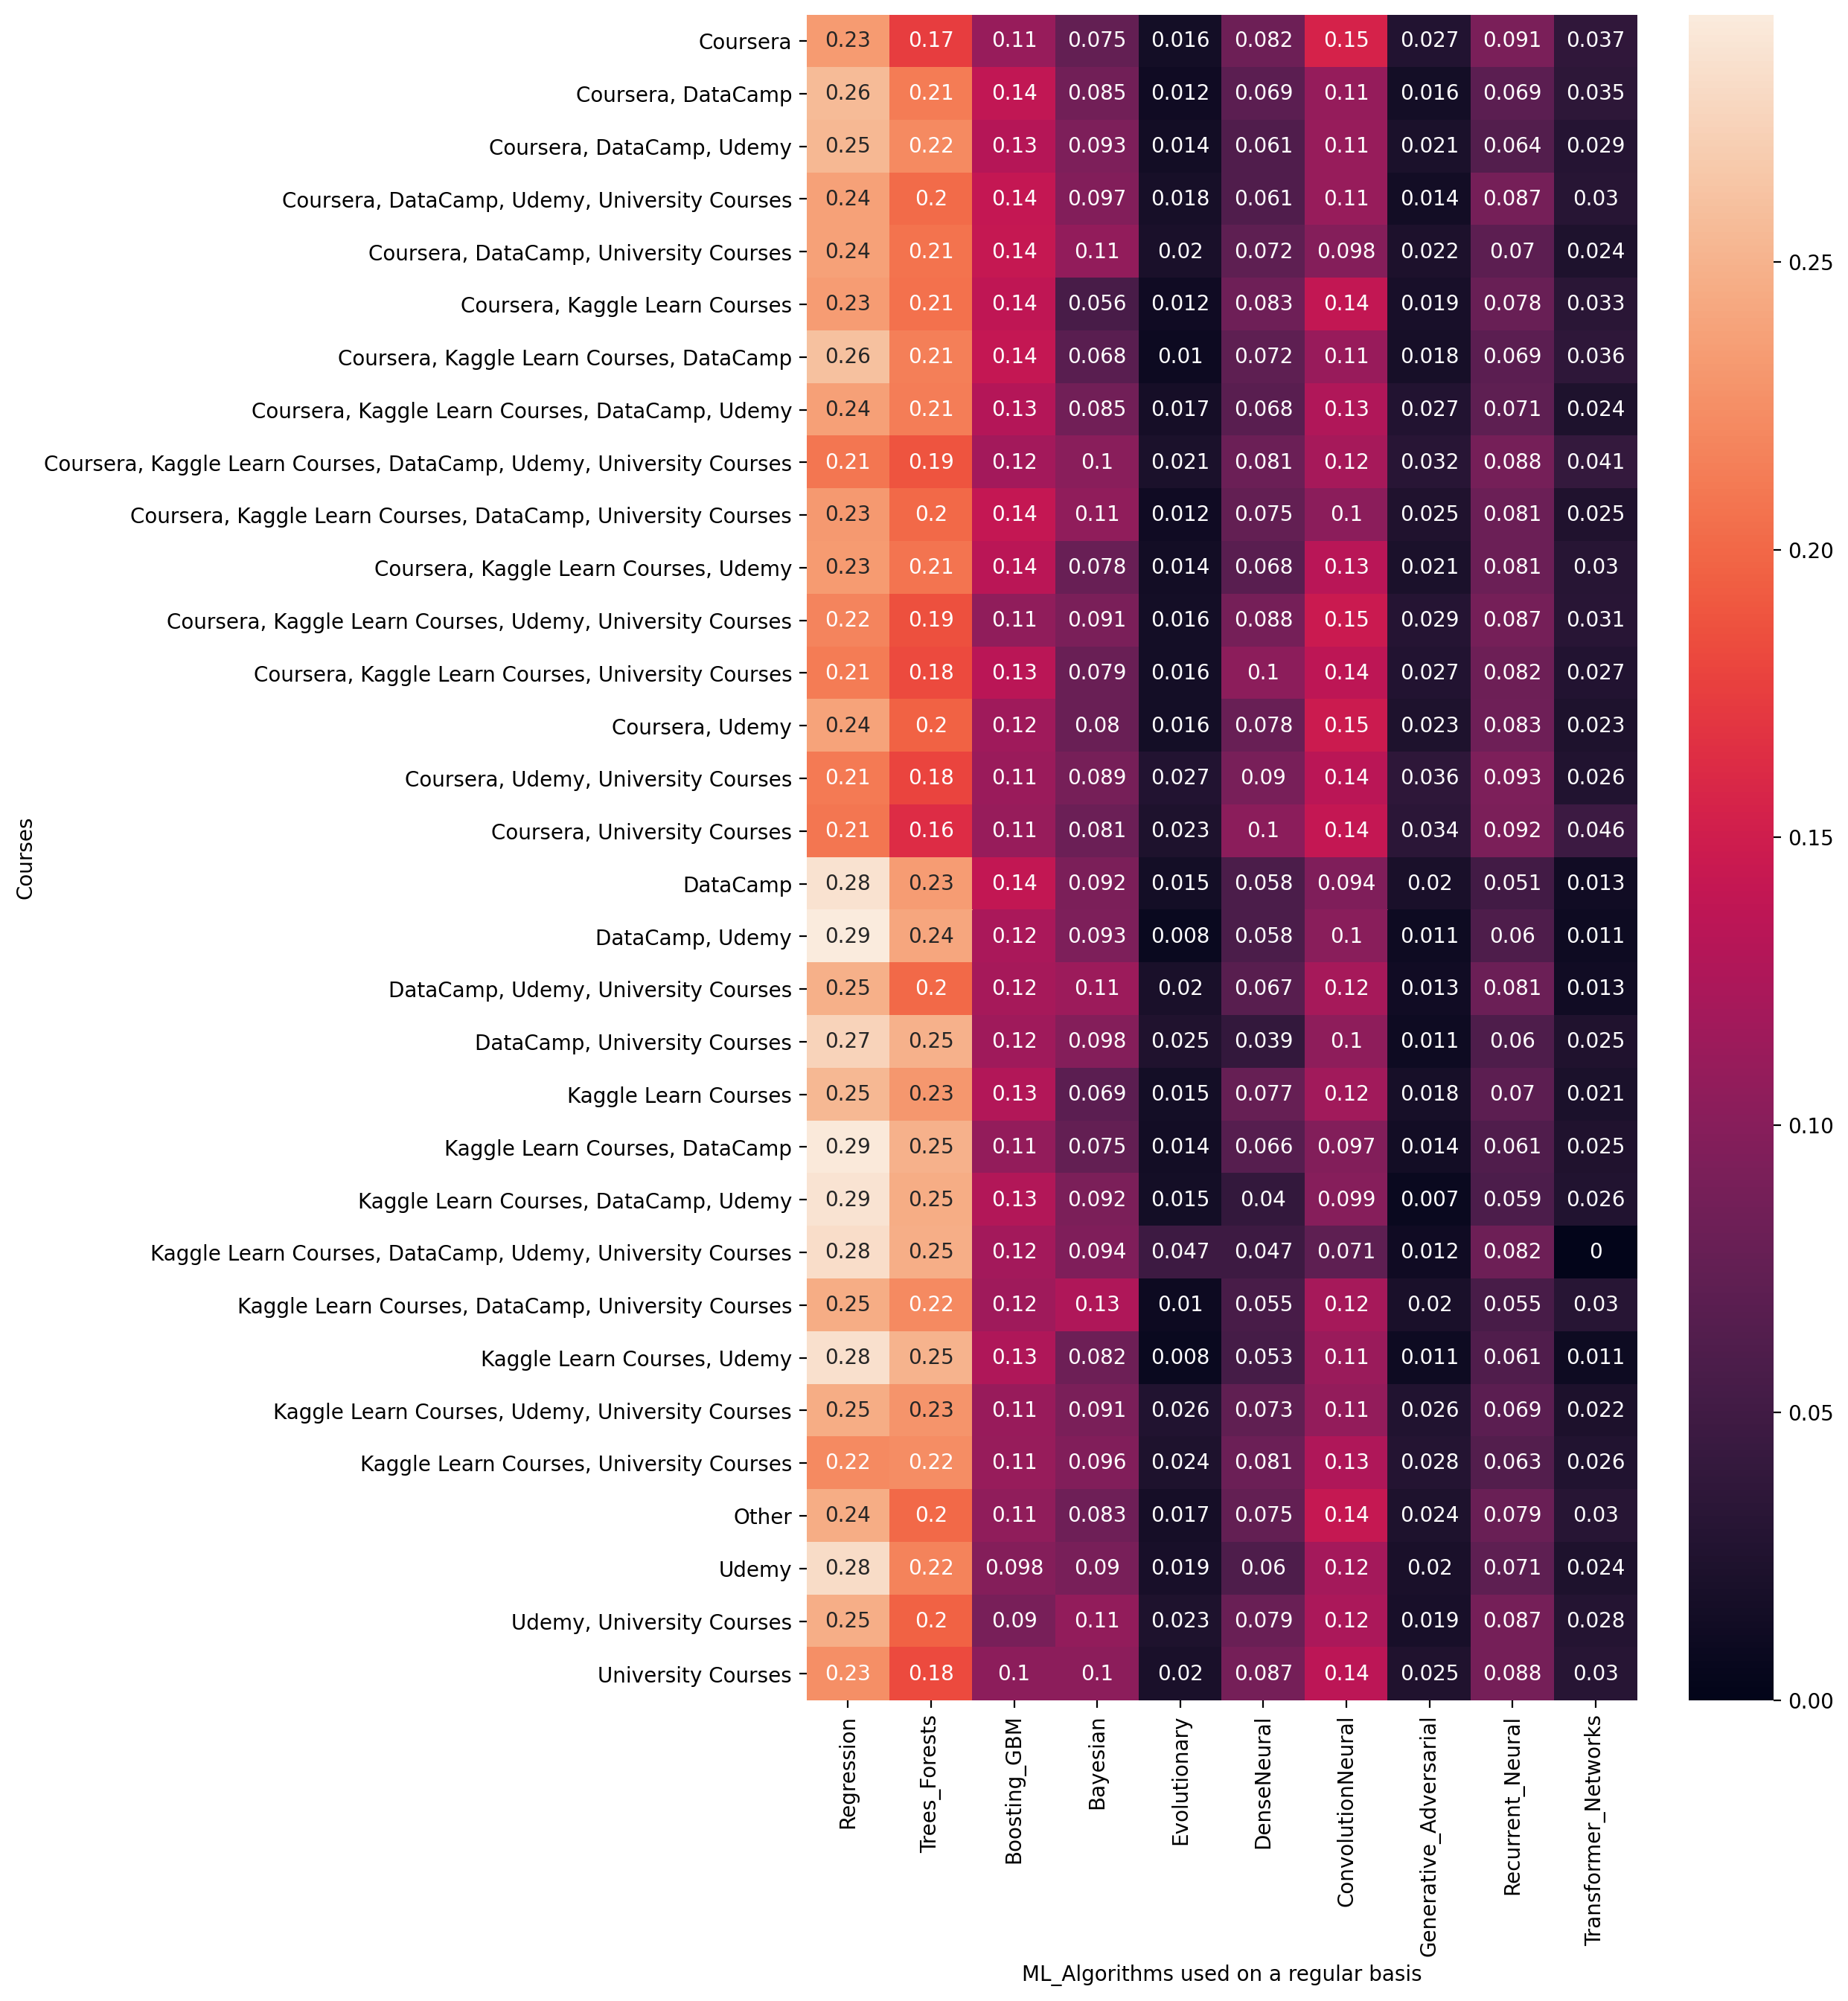

In [52]:
plt.figure(dpi = 200, figsize=(9,15))
ax = sns.heatmap(Course_and_algo.apply(lambda x: round(x/x.sum(), 3)).transpose(), annot = True)
ax.set(xlabel = 'ML_Algorithms used on a regular basis');

In [53]:
#Linear Regression seems to be in the range of 20% - 30% for ML algorithms used on a regular basis which makes sense because almost every course will teach Linear Regression first and using the model is very simple

#Trees and Forests are used a bit less than Linear Regression but the range is still in between 19% to 26.3% so it is still widely used and doesn't differ much by which courses Kagglers have done

#All of these ML Algorithms barely deviate in use based on which course you took.

So now I want to see if size of a company affect which gender they choose to hire

In [54]:
company_gender = df[['Q2', 'Q20', 'Q4']]
company_gender.dropna(inplace = True)

company_gender.columns = ['Gender', 'Size_Of_Company', 'Degree']
size = pd.get_dummies(company_gender['Size_Of_Company'])

company_gender = pd.concat([company_gender.drop('Size_Of_Company', axis = 1), size], axis = 1)

company_gender.drop('Degree', axis = 1).groupby('Gender').sum()

0-49 employees  10,000 or more employees  \
Gender                                                              
Man                              3439.0                    1870.0   
Nonbinary                           9.0                       2.0   
Prefer not to say                  43.0                      42.0   
Prefer to self-describe            11.0                       6.0   
Woman                             706.0                     318.0   

                         1000-9,999 employees  250-999 employees  \
Gender                                                             
Man                                    1623.0             1078.0   
Nonbinary                                 3.0                5.0   
Prefer not to say                        18.0               15.0   
Prefer to self-describe                   0.0                4.0   
Woman                                   290.0              250.0   

                         50-249 employees  
Gender                                     
Man                                1362.0  
Nonbinary                             3.0  
Prefer not to say                    21.0  
Prefer to self-describe               3.0  
Woman                               282.0

In [55]:
cg = company_gender.drop('Degree', axis = 1).groupby('Gender').mean().round(3)
cg

0-49 employees  10,000 or more employees  \
Gender                                                              
Man                               0.367                     0.200   
Nonbinary                         0.409                     0.091   
Prefer not to say                 0.309                     0.302   
Prefer to self-describe           0.458                     0.250   
Woman                             0.382                     0.172   

                         1000-9,999 employees  250-999 employees  \
Gender                                                             
Man                                     0.173              0.115   
Nonbinary                               0.136              0.227   
Prefer not to say                       0.129              0.108   
Prefer to self-describe                 0.000              0.167   
Woman                                   0.157              0.135   

                         50-249 employees  
Gender                                     
Man                                 0.145  
Nonbinary                           0.136  
Prefer not to say                   0.151  
Prefer to self-describe             0.125  
Woman                               0.153

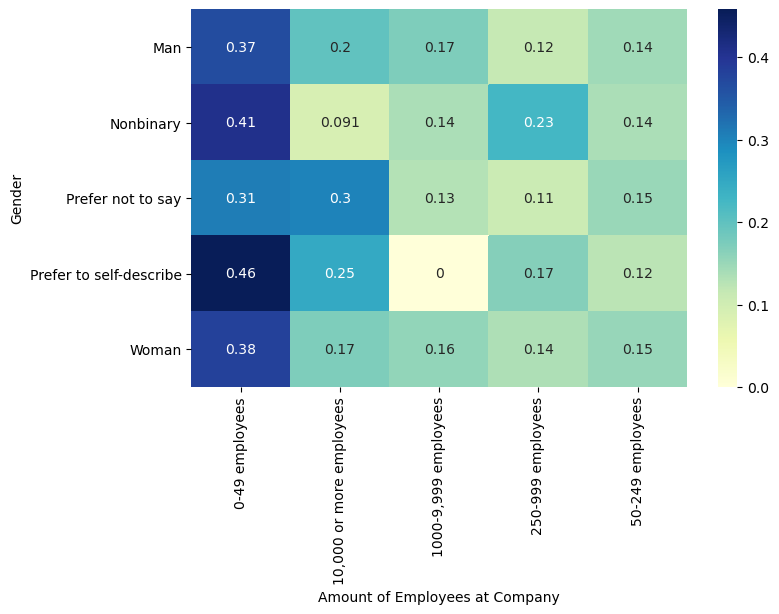

In [56]:
plt.figure(dpi = 100, figsize = (8,5))
ax = sns.heatmap(data = cg, annot = True, cmap="YlGnBu")
ax.set(xlabel = 'Amount of Employees at Company');

In [57]:
#Due to Kagglers who put themselves in "Prefer to self-describe" and "Nonbinary" having such a low amount of people who are in companies, I cannot accurately say anything about their numbers

#For "Men", "Women", and people who "Prefer not to say" it seems like companies almost equally have people based on their gender. No company size really leans more towards a specific gender

#There is an exception for 'Prefer not to say', 30% of them work with 10,000 or more employees which is significantly higher than Males or Females.

Let me now add on the degrees people have along with their gender and size of the company to see if there is any relation between the gender and degree Kagglers have compared to the size of their company

In [58]:
#I'm only going to include the genders male and female to stop the data from becoming too big
company_gender = company_gender[(company_gender['Gender'] == 'Man') | (company_gender['Gender'] == 'Woman')]
company_gender.groupby(['Gender', 'Degree']).sum()

0-49 employees  \
Gender Degree                                                 
Man    Bachelor’s degree                             1120.0   
       College without Bachelor's degree              198.0   
       Doctoral degree                                455.0   
       I prefer not to answer                          73.0   
       Master’s degree                               1387.0   
       No formal education past high school            52.0   
       Professional degree                            154.0   
Woman  Bachelor’s degree                              198.0   
       College without Bachelor's degree               24.0   
       Doctoral degree                                109.0   
       I prefer not to answer                          12.0   
       Master’s degree                                330.0   
       No formal education past high school             4.0   
       Professional degree                             29.0   

                                             10,000 or more employees  \
Gender Degree                                                           
Man    Bachelor’s degree                                        564.0   
       College without Bachelor's degree                         31.0   
       Doctoral degree                                          229.0   
       I prefer not to answer                                    26.0   
       Master’s degree                                          931.0   
       No formal education past high school                      12.0   
       Professional degree                                       77.0   
Woman  Bachelor’s degree                                        108.0   
       College without Bachelor's degree                          4.0   
       Doctoral degree                                           36.0   
       I prefer not to answer                                     3.0   
       Master’s degree                                          153.0   
       No formal education past high school                       0.0   
       Professional degree                                       14.0   

                                             1000-9,999 employees  \
Gender Degree                                                       
Man    Bachelor’s degree                                    407.0   
       College without Bachelor's degree                     43.0   
       Doctoral degree                                      301.0   
       I prefer not to answer                                14.0   
       Master’s degree                                      776.0   
       No formal education past high school                  13.0   
       Professional degree                                   69.0   
Woman  Bachelor’s degree                                     72.0   
       College without Bachelor's degree                      3.0   
       Doctoral degree                                       69.0   
       I prefer not to answer                                 1.0   
       Master’s degree                                      133.0   
       No formal education past high school                   0.0   
       Professional degree                                   12.0   

                                             250-999 employees  \
Gender Degree                                                    
Man    Bachelor’s degree                                 283.0   
       College without Bachelor's degree                  32.0   
       Doctoral degree                                   218.0   
       I prefer not to answer                             11.0   
       Master’s degree                                   475.0   
       No formal education past high school               12.0   
       Professional degree                                47.0   
Woman  Bachelor’s degree                                  62.0   
       College without Bachelor's degree                   2.0   
       Doctoral degree              

In [59]:
cgd = company_gender.groupby(['Gender', 'Degree']).mean()
cgd

0-49 employees  \
Gender Degree                                                 
Man    Bachelor’s degree                           0.413895   
       College without Bachelor's degree           0.538043   
       Doctoral degree                             0.319298   
       I prefer not to answer                      0.517730   
       Master’s degree                             0.329141   
       No formal education past high school        0.490566   
       Professional degree                         0.373786   
Woman  Bachelor’s degree                           0.390533   
       College without Bachelor's degree           0.585366   
       Doctoral degree                             0.328313   
       I prefer not to answer                      0.444444   
       Master’s degree                             0.386870   
       No formal education past high school        1.000000   
       Professional degree                         0.353659   

                                             10,000 or more employees  \
Gender Degree                                                           
Man    Bachelor’s degree                                     0.208426   
       College without Bachelor's degree                     0.084239   
       Doctoral degree                                       0.160702   
       I prefer not to answer                                0.184397   
       Master’s degree                                       0.220930   
       No formal education past high school                  0.113208   
       Professional degree                                   0.186893   
Woman  Bachelor’s degree                                     0.213018   
       College without Bachelor's degree                     0.097561   
       Doctoral degree                                       0.108434   
       I prefer not to answer                                0.111111   
       Master’s degree                                       0.179367   
       No formal education past high school                  0.000000   
       Professional degree                                   0.170732   

                                             1000-9,999 employees  \
Gender Degree                                                       
Man    Bachelor’s degree                                 0.150407   
       College without Bachelor's degree                 0.116848   
       Doctoral degree                                   0.211228   
       I prefer not to answer                            0.099291   
       Master’s degree                                   0.184148   
       No formal education past high school              0.122642   
       Professional degree                               0.167476   
Woman  Bachelor’s degree                                 0.142012   
       College without Bachelor's degree                 0.073171   
       Doctoral degree                                   0.207831   
       I prefer not to answer                            0.037037   
       Master’s degree                                   0.155920   
       No formal education past high school              0.000000   
       Professional degree                               0.146341   

                                             250-999 employees  \
Gender Degree                                                    
Man    Bachelor’s degree                              0.104582   
       College without Bachelor's degree              0.086957   
       Doctoral degree                                0.152982   
       I prefer not to answer                         0.078014   
       Master’s degree                                0.112720   
       No formal education past high school           0.113208   
       Professional degree                            0.114078   
Woman  Bachelor’s degree                              0.122288   
       College without Bachelor's degree              0.048780   
       Doctoral degree              

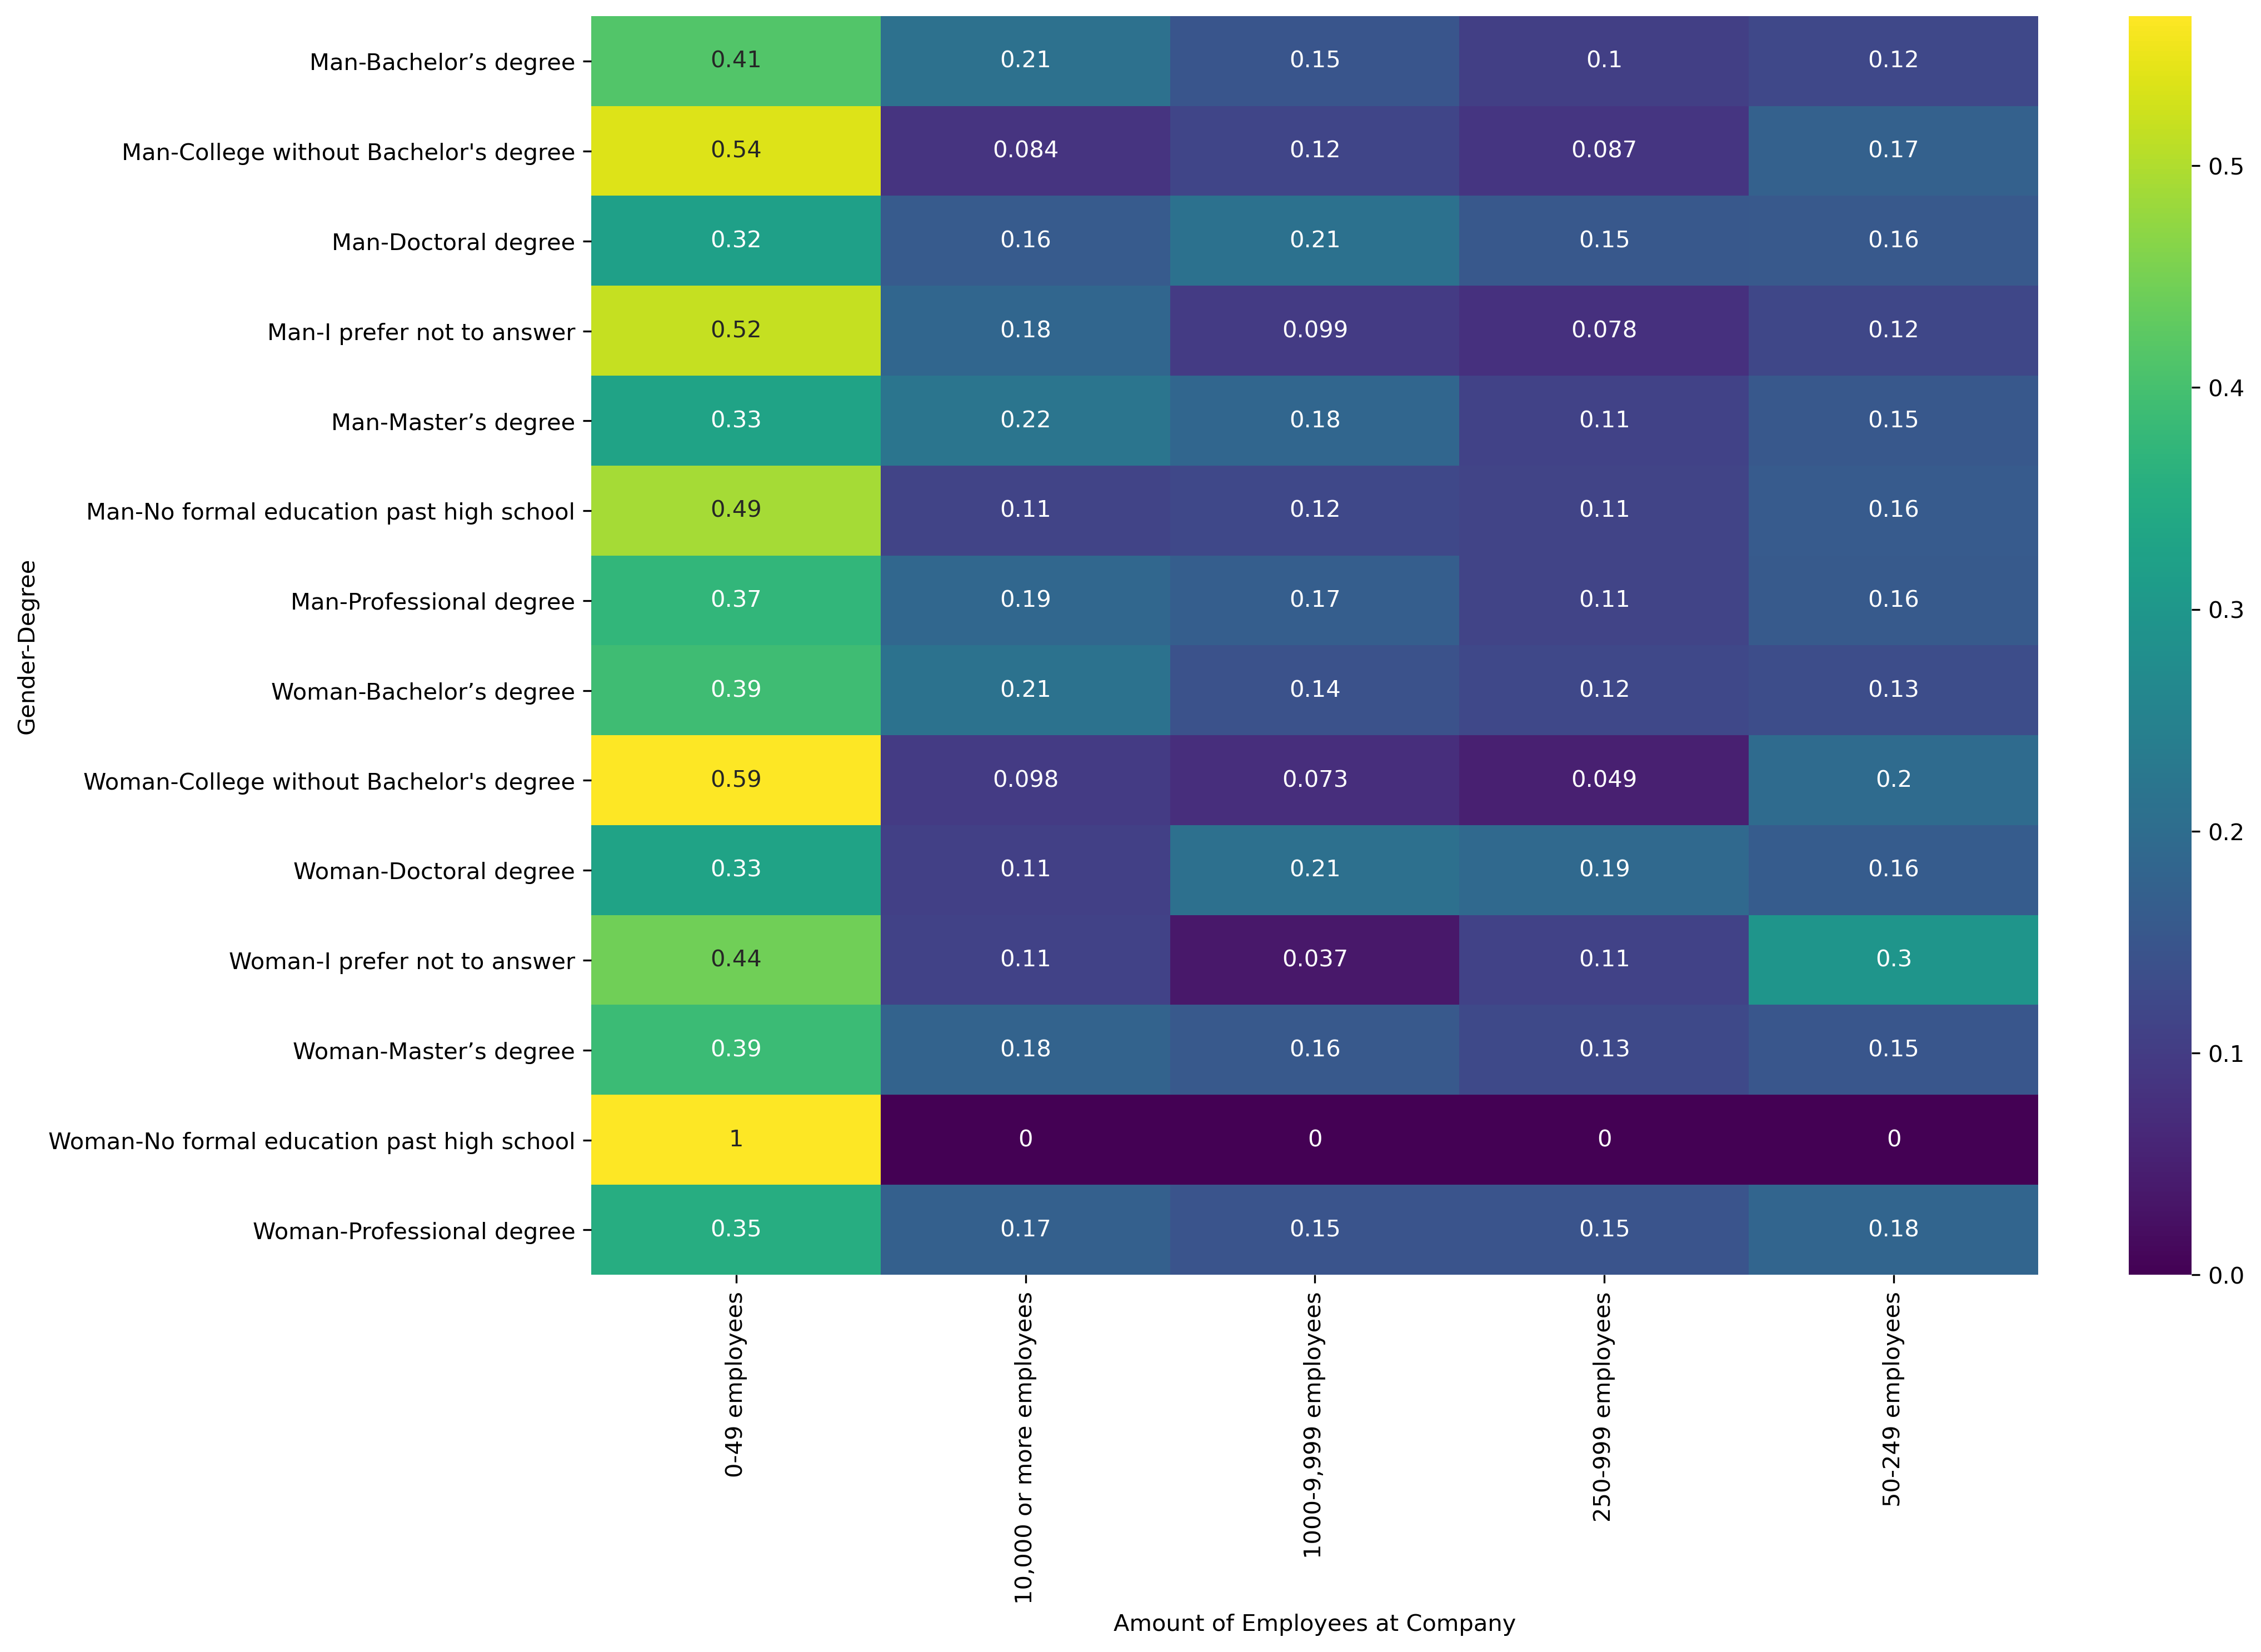

In [60]:
plt.figure(dpi = 300, figsize=(14,10))
ax = sns.heatmap(cgd, annot = True, robust = True, cmap = 'viridis')
ax.set(xlabel = 'Amount of Employees at Company');

In [61]:
#Seems that Woman and Men with their respective degrees have close to the same percentage of companies hiring them based on company sizes. However, Men were hired a bit more with bigger companies while women were hired a bit more into smaller companies.

#Another interesting observation is that Kagglers with Doctoral degrees actually tend not to work at companies with 10,000 or more employees than those with Bachelors and Masters no matter the gender.

How do Kagglers degree affect which automated ML tool they use?

In [62]:
tool_deg = df[['Q4', 'Q34_A_Part_1', 'Q34_A_Part_2','Q34_A_Part_3','Q34_A_Part_4','Q34_A_Part_5','Q34_A_Part_6','Q34_A_Part_7','Q34_A_Part_8','Q34_A_Part_9','Q34_A_Part_10','Q34_A_Part_11','Q34_A_OTHER',]]

tool_deg.columns = ['Degree', 'Google Cloud', 'H20 Driverless AI', 'DataBricks AutoML', 'DataRobots AutoML', 'Tpot', 'Auto-Keras', 'Auto-Sklearn', 'Auto_ml', 'Xcessiv', 'MLbox', 'None', 'Other']

tool_deg.groupby('Degree').count()

Google Cloud  H20 Driverless AI  \
Degree                                                                  
Bachelor’s degree                               91                 40   
College without Bachelor's degree               14                  6   
Doctoral degree                                 55                 27   
I prefer not to answer                           4                  1   
Master’s degree                                180                 81   
No formal education past high school             1                  1   
Professional degree                             16                  6   
nan                                              0                  0   

                                      DataBricks AutoML  DataRobots AutoML  \
Degree                                                                       
Bachelor’s degree                                    37                 41   
College without Bachelor's degree                     6                  7   
Doctoral degree                                      26                 20   
I prefer not to answer                                2                  1   
Master’s degree                                      68                 75   
No formal education past high school                  0                  0   
Professional degree                                   8                  7   
nan                                                   0                  0   

                                      Tpot  Auto-Keras  Auto-Sklearn  Auto_ml  \
Degree                                                                          
Bachelor’s degree                       26         106           154       80   
College without Bachelor's degree        4          13            23       13   
Doctoral degree                         21          95           109       47   
I prefer not to answer                   1           5             6        5   
Master’s degree                         65         174           260      128   
No formal education past high school     0           0             3        2   
Professional degree                      3          24            27       12   
nan                                      0           0             0        0   

                                      Xcessiv  MLbox  None  Other  
Degree                                                             
Bachelor’s degree                          11     34   165     36  
College without Bachelor's degree           3      6    19      3  
Doctoral degree                             5     14   119     33  
I prefer not to answer                      1      2     6      1  
Master’s degree                            23     50   308     81  
No formal education past high school        1      0     7      0  
Professional degree                         0      5    19      7  
nan                                         0      0     0      0

In [63]:
tg = tool_deg.groupby('Degree').count().transpose().apply(lambda x: round(x/x.sum(), 3)).transpose()
tg

Google Cloud  H20 Driverless AI  \
Degree                                                                  
Bachelor’s degree                            0.111              0.049   
College without Bachelor's degree            0.120              0.051   
Doctoral degree                              0.096              0.047   
I prefer not to answer                       0.114              0.029   
Master’s degree                              0.121              0.054   
No formal education past high school         0.067              0.067   
Professional degree                          0.119              0.045   
nan                                            NaN                NaN   

                                      DataBricks AutoML  DataRobots AutoML  \
Degree                                                                       
Bachelor’s degree                                 0.045              0.050   
College without Bachelor's degree                 0.051              0.060   
Doctoral degree                                   0.046              0.035   
I prefer not to answer                            0.057              0.029   
Master’s degree                                   0.046              0.050   
No formal education past high school              0.000              0.000   
Professional degree                               0.060              0.052   
nan                                                 NaN                NaN   

                                       Tpot  Auto-Keras  Auto-Sklearn  \
Degree                                                                  
Bachelor’s degree                     0.032       0.129         0.188   
College without Bachelor's degree     0.034       0.111         0.197   
Doctoral degree                       0.037       0.166         0.191   
I prefer not to answer                0.029       0.143         0.171   
Master’s degree                       0.044       0.117         0.174   
No formal education past high school  0.000       0.000         0.200   
Professional degree                   0.022       0.179         0.201   
nan                                     NaN         NaN           NaN   

                                      Auto_ml  Xcessiv  MLbox   None  Other  
Degree                                                                       
Bachelor’s degree                       0.097    0.013  0.041  0.201  0.044  
College without Bachelor's degree       0.111    0.026  0.051  0.162  0.026  
Doctoral degree                         0.082    0.009  0.025  0.208  0.058  
I prefer not to answer                  0.143    0.029  0.057  0.171  0.029  
Master’s degree                         0.086    0.015  0.033  0.206  0.054  
No formal education past high school    0.133    0.067  0.000  0.467  0.000  
Professional degree                     0.090    0.000  0.037  0.142  0.052  
nan                                       NaN      NaN    NaN    NaN    NaN

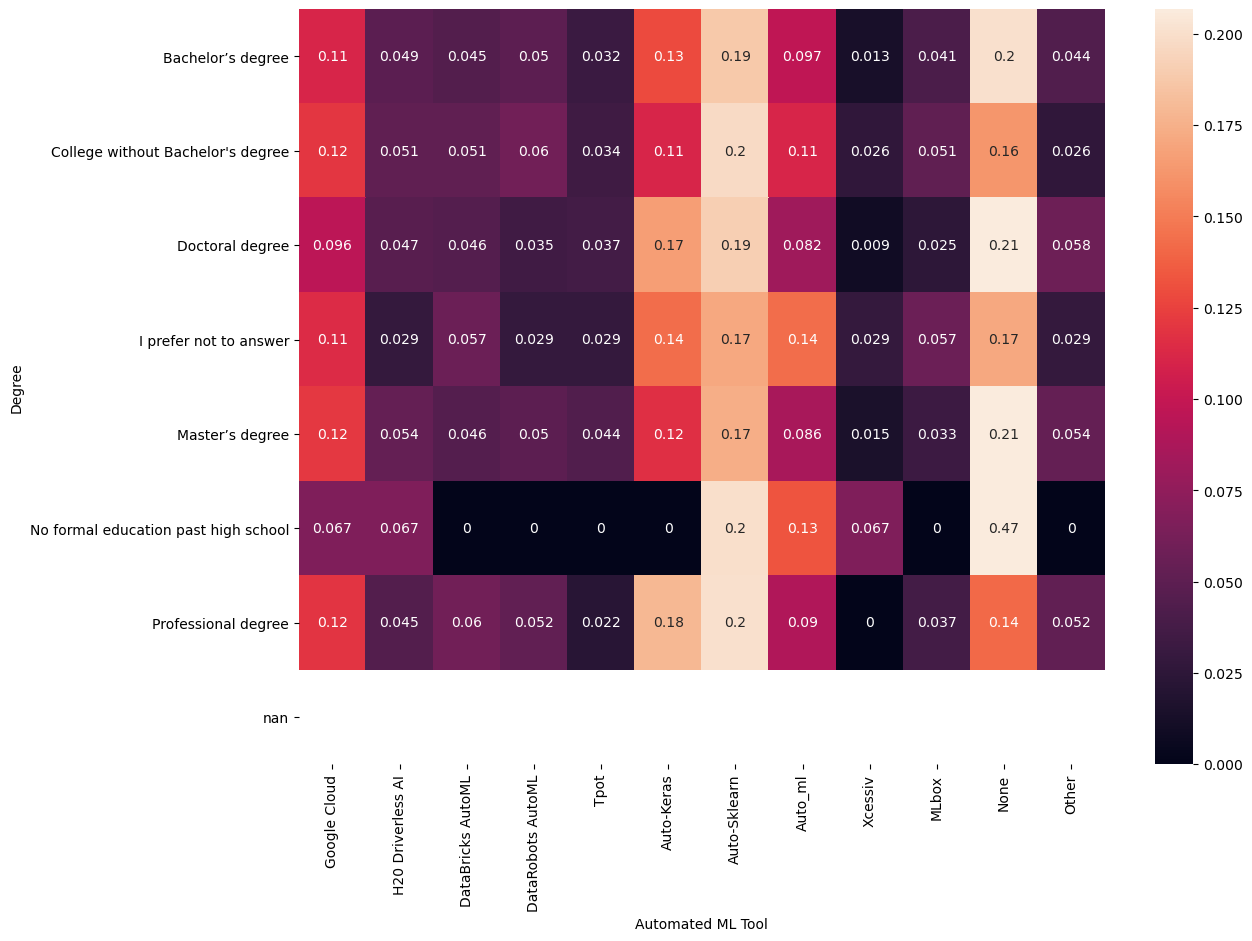

In [64]:
plt.figure(dpi = 100, figsize = (13,10))
ax = sns.heatmap(tg, annot=True, robust=True)
ax.set(xlabel = 'Automated ML Tool');

In [65]:
#Kagglers mainly use Auto-Sklearn, Auto_Keras, or no automated ML tool at all


#Kagglers with Professional degrees and without degrees also tend to use Auto_ML

How does a Kagglers compensation compare to the amount of years they've been coding?

In [66]:
comp = df[['Q2','Q4', 'Q6', 'Q24']]
comp = comp.dropna() #Going to have to remove the null values in the compensation column
comp.columns = ['Gender', 'Degree', 'Years_Coding', 'Compensation']

comp['Compensation'].value_counts() 

$0-999             2128
10,000-14,999       665
1,000-1,999         581
100,000-124,999     573
40,000-49,999       552
30,000-39,999       540
50,000-59,999       510
5,000-7,499         488
15,000-19,999       449
60,000-69,999       408
20,000-24,999       404
70,000-79,999       394
7,500-9,999         371
150,000-199,999     347
2,000-2,999         330
125,000-149,999     315
25,000-29,999       310
90,000-99,999       280
4,000-4,999         279
80,000-89,999       273
3,000-3,999         264
200,000-249,999     115
300,000-500,000      55
> $500,000           50
250,000-299,999      48
Name: Compensation, dtype: int64

In [67]:
#Way too many values, I need to narrow them down a bit

In [68]:
def compensation(count):
    if(('125,000' in count) or ('100,000' in count) or ('150,000' in count)):
        return '100,000-199,999'
    elif(('200,000' in count) or ('250,000' in count)):
        return '200,000-299,999'
    elif(('1,000' in count) or ('2,000' in count) or ('3,000' in count) or ('4,000' in count)):
        return '1,000-4,999'
    elif(('5,000' in count) or ('7,500' in count)):
        return '5,000-9,999'
    elif(('10,000' in count) or ('20,000' in count) or ('25,000' in count)):
        return '10,000-29,999'
    elif(('30,000' in count) or ('40,000' in count)):
        return '30,000-49,999'
    elif(('50,000' in count) or ('60,000' in count)):
        return '50,000-69,999'
    elif(('70,000' in count) or ('80,000' in count) or ('90,000' in count)):
        return '70,000-99,999'
    else:
        return count

comp['Compensation'] = np.vectorize(compensation)(comp['Compensation'])
        

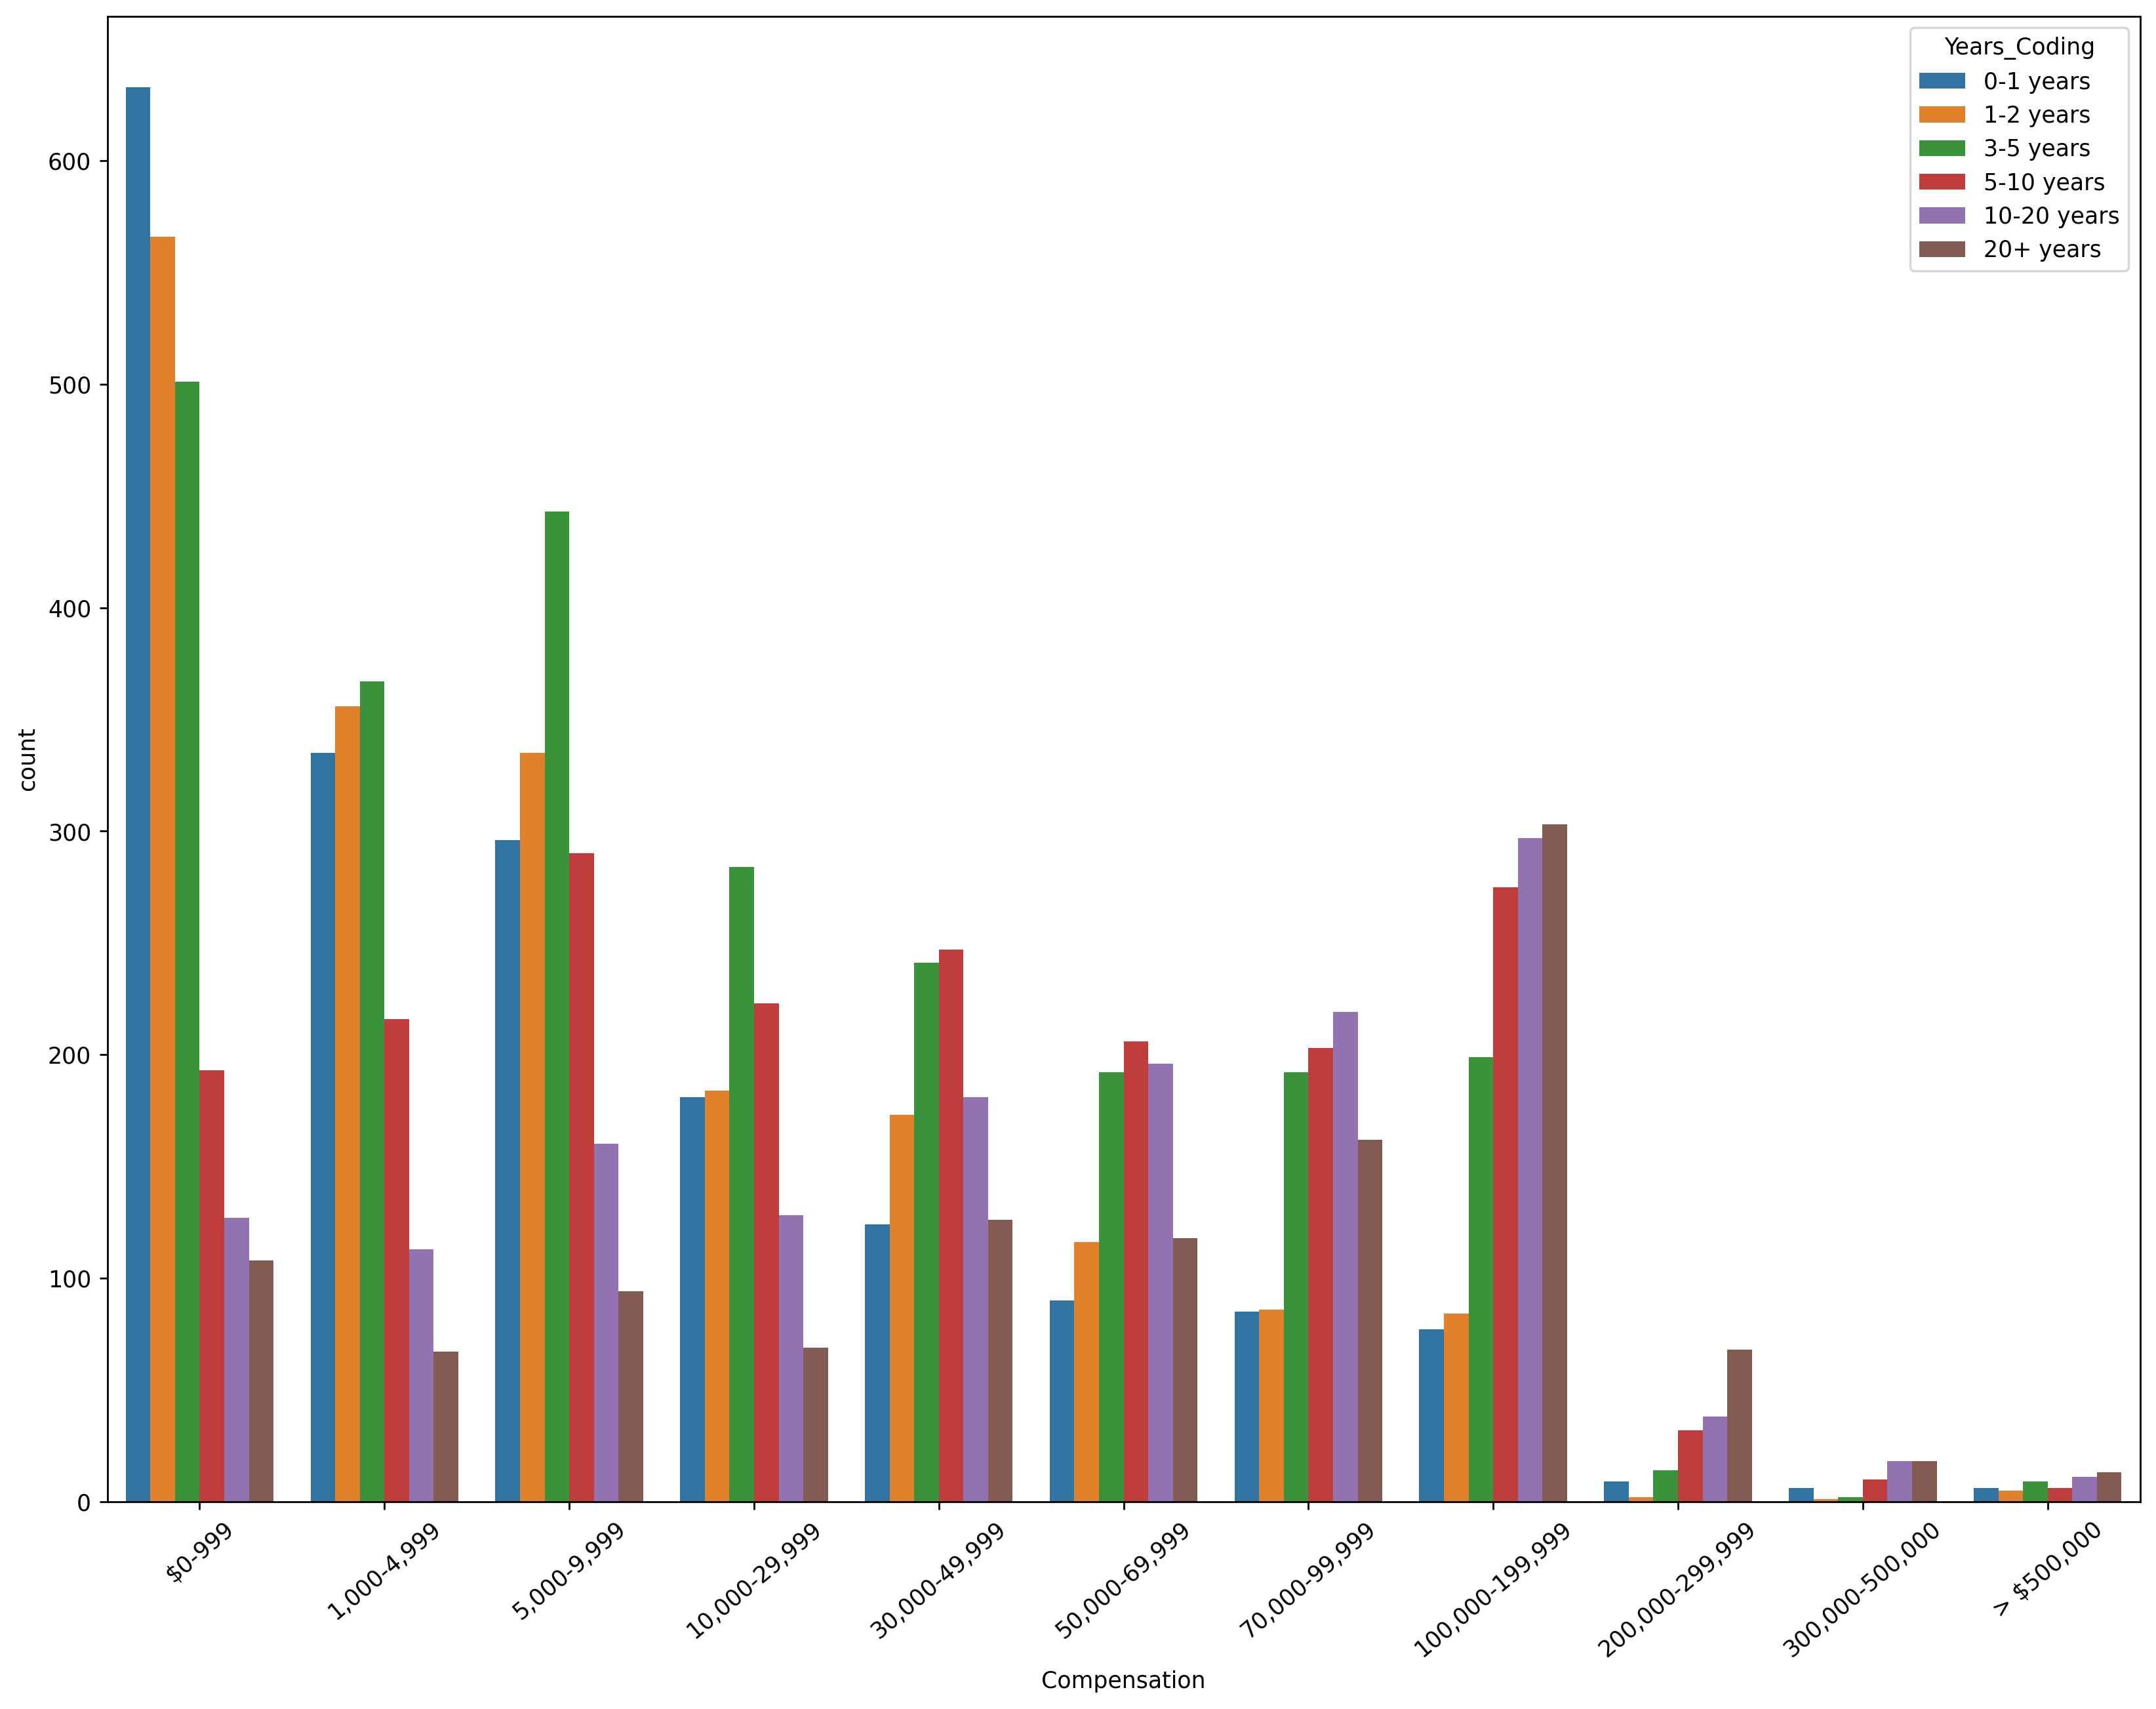

In [69]:
#Also going to narrow down the genders and years of coding a bit for easier graphing capabilities
def Genders(gender):
    if(('Man' in gender) or ('Woman' in gender)):
        return gender
    else:
        return 'Other'
comp['Gender'] = np.vectorize(Genders)(comp['Gender'])

def Years(year):
    if(('I' in year) or ('<' in year)):
        return '0-1 years'
    else:
        return year
comp['Years_Coding'] = np.vectorize(Years)(comp['Years_Coding'])

plt.figure(figsize=(16, 12), dpi = 250)
plt.xticks(rotation = 40)
sns.countplot(data = comp, x = 'Compensation', order =['$0-999', '1,000-4,999', '5,000-9,999', '10,000-29,999', '30,000-49,999', '50,000-69,999', '70,000-99,999', '100,000-199,999', '200,000-299,999', '300,000-500,000', '> $500,000'], hue = 'Years_Coding', hue_order=['0-1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']);

In [70]:
#The countplot is skewed to the right which makes sense considering a lot of people using Kaggle are still in school and therefore are not making much money because they don't have a job.

#Most data in the graph is expected such as 0-1 years of coding experience have the highest count in making $0-999, 3-5 years of coding experience has the highest count in making $5000-9999 and 20+ years of coding experience have the highest count in making $100,000 and above. 

#Other parts of the data, however, don't make as much sense, some people with barely any coding experience are making more than $100,000 (could be due to them having other jobs and just doing coding on the side) and some people with over 10+ years of coding are making almost no money at all (maybe because they're still in school?)

What is the correlation between the amount of years a Kaggler has been coding and the degree they have?

In [71]:
comp.groupby('Degree').sum()
cyg = comp.copy()

In [72]:
Year = pd.get_dummies(comp['Years_Coding'])
comp = pd.concat([comp, Year], axis = 1)

comp.groupby('Degree').mean().round(3)

0-1 years  1-2 years  10-20 years  \
Degree                                                                    
Bachelor’s degree                         0.211      0.240        0.087   
College without Bachelor's degree         0.291      0.203        0.101   
Doctoral degree                           0.088      0.077        0.250   
I prefer not to answer                    0.253      0.190        0.089   
Master’s degree                           0.156      0.173        0.132   
No formal education past high school      0.311      0.151        0.132   
Professional degree                       0.234      0.181        0.179   

                                      20+ years  3-5 years  5-10 years  
Degree                                                                  
Bachelor’s degree                         0.061      0.261       0.139  
College without Bachelor's degree         0.138      0.148       0.119  
Doctoral degree                           0.212      0.152       0.222  
I prefer not to answer                    0.114      0.215       0.139  
Master’s degree                           0.094      0.249       0.196  
No formal education past high school      0.189      0.142       0.075  
Professional degree                       0.098      0.164       0.145

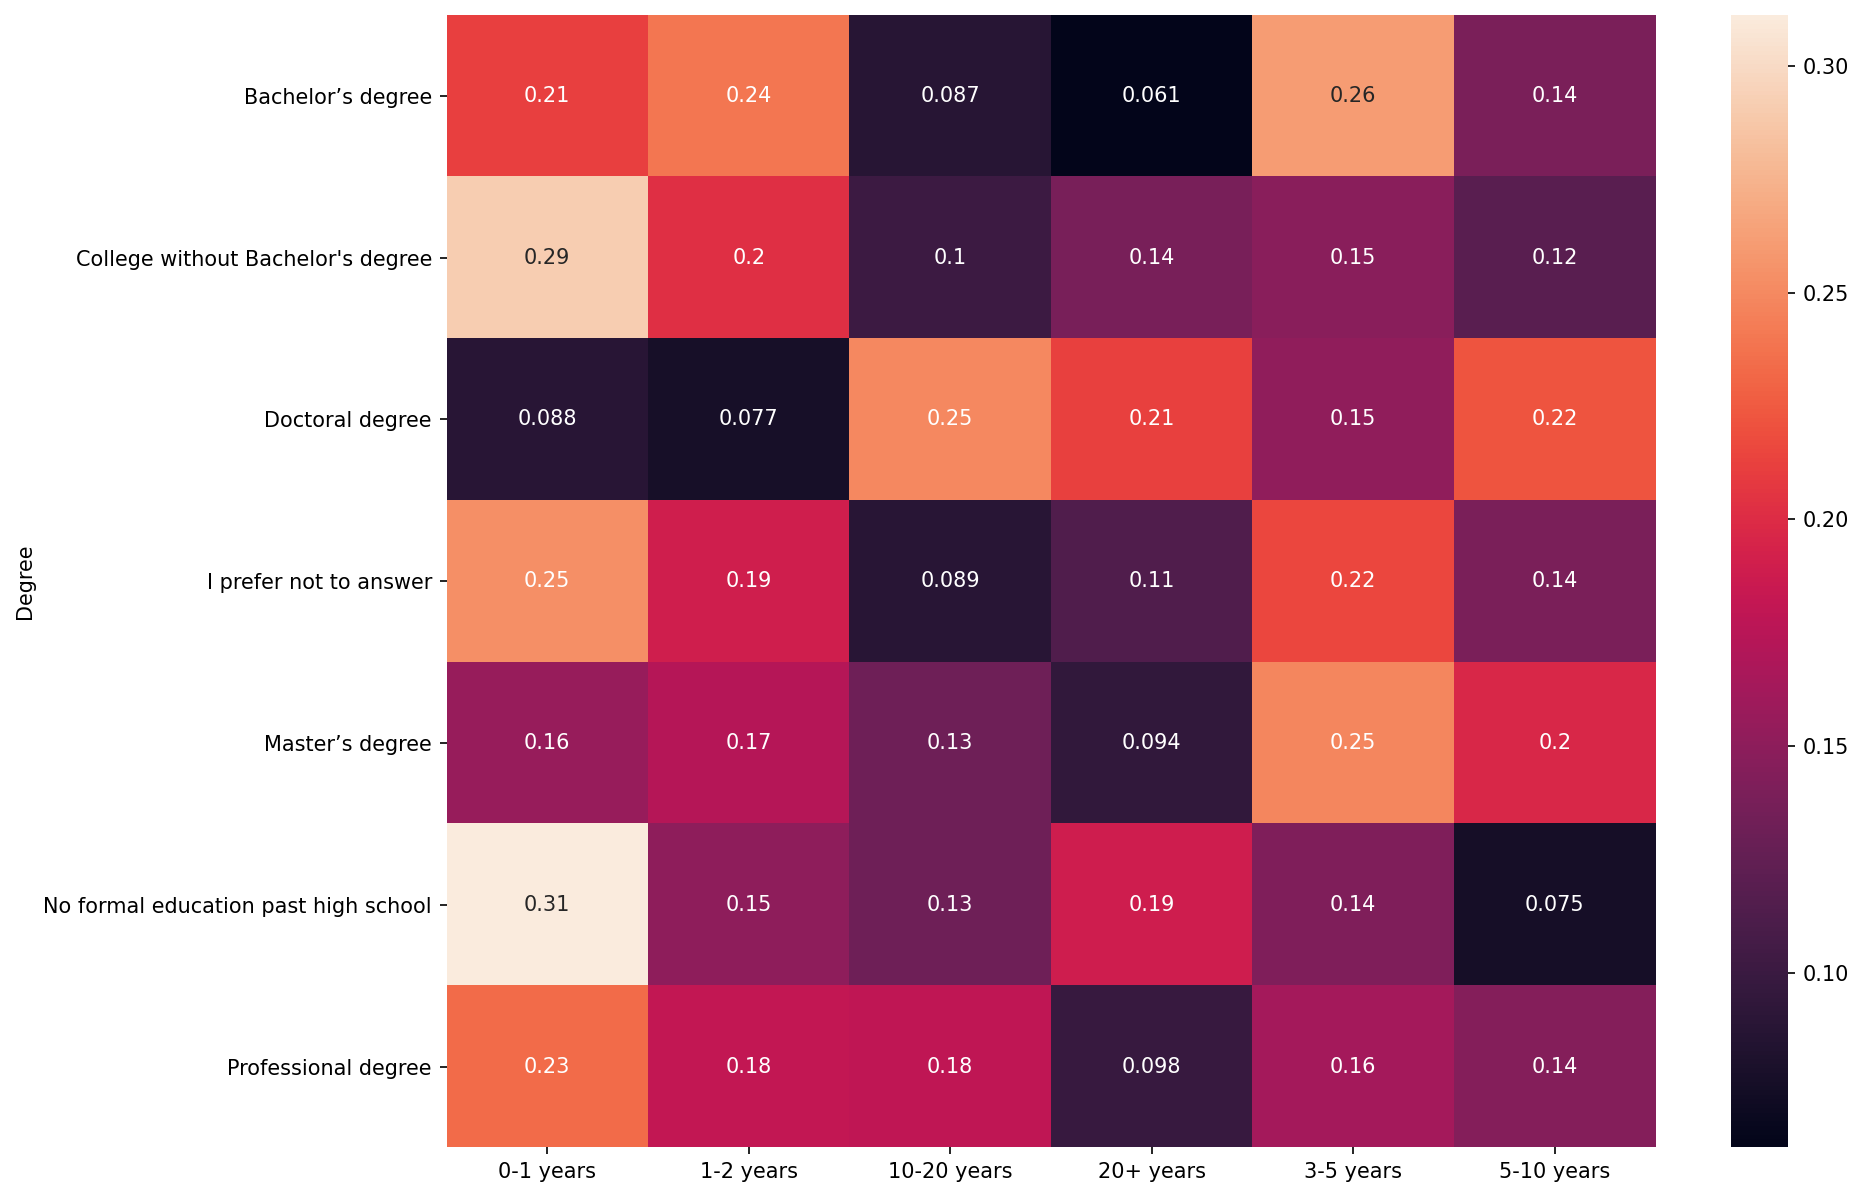

In [73]:
plt.figure(figsize = (13,10), dpi =  150)
sns.heatmap(data = comp.groupby('Degree').mean(), annot = True);

In [74]:
#A surprising 21% of Bachelors degrees, 16% of Masters degrees, and 23% of Professional degrees only have 0-1 Years of Coding experience. 

#Along with this, 24% of Bachelors degrees, 17% of Masters degrees, and 18% of Professional degrees only have 1-2 Years of Coding experience which is still highly unusual for the degree that they have.

#These results can be explained by Kagglers who are just doing coding on the side and have actually gotten a degree in a different field unrelated to coding.

#18.9% of people with no formal education past highschool and 13.8% of people doing college/University without earning a bachelors degree have 20+ years of coding experience which is clearly unreasonable

Lastly, I am going to compare 

In [75]:
def compensation(count):
    if(('30,000' in count) or ('10,000' in count)):
        return '$10,000-49,999'
    elif(('50,000' in count) or ('70,000' in count)):
        return '$50,000-99,999'
    elif(('100,000' in count) or ('200,000' in count)):
        return '$100,000-299,999'
    elif(('300,000' in count) or '>' in count):
        return '> $300,000'
    elif('0-999' in count):
        return count
    else:
        return '$' + count

#comp['Compensation'] = np.vectorize(compensation)(comp['Compensation'])
cyg['Compensation'] = np.vectorize(compensation)(cyg['Compensation'])
        

In [76]:
def Degrees(degree):
    if(('Some' in degree) or ('I' in degree) or ('No' in degree)):
        return 'No_Degree'
    else:
        return degree
#comp['Degree'] = np.vectorize(Degrees)(comp['Degree']) 
cyg['Degree'] = np.vectorize(Degrees)(cyg['Degree']) 

compensations = pd.get_dummies(cyg['Compensation'])
cyg = pd.concat([cyg.drop('Compensation', axis = 1), compensations], axis = 1)

#comp.groupby(['Degree', 'Compensation']).sum()

cyg.groupby(['Degree', 'Years_Coding']).sum()

$0-999  $1,000-4,999  \
Degree                            Years_Coding                         
Bachelor’s degree                 0-1 years      244.0         121.0   
                                  1-2 years      273.0         144.0   
                                  10-20 years     22.0          12.0   
                                  20+ years       17.0          17.0   
                                  3-5 years      183.0         139.0   
                                  5-10 years      42.0          50.0   
College without Bachelor's degree 0-1 years       53.0          24.0   
                                  1-2 years       24.0          15.0   
                                  10-20 years      6.0           3.0   
                                  20+ years        6.0           3.0   
                                  3-5 years       15.0           7.0   
                                  5-10 years       6.0          10.0   
Doctoral degree                   0-1 years       46.0          34.0   
                                  1-2 years       26.0          30.0   
                                  10-20 years     33.0          41.0   
                                  20+ years       30.0          22.0   
                                  3-5 years       50.0          43.0   
                                  5-10 years      39.0          52.0   
Master’s degree                   0-1 years      226.0         123.0   
                                  1-2 years      198.0         144.0   
                                  10-20 years     53.0          41.0   
                                  20+ years       42.0          18.0   
                                  3-5 years      222.0         153.0   
                                  5-10 years      89.0          99.0   
No_Degree                         0-1 years       33.0          14.0   
                                  1-2 years       22.0           6.0   
                                  10-20 years      6.0           3.0   
                                  20+ years        8.0           3.0   
                                  3-5 years       16.0          12.0   
                                  5-10 years       5.0           2.0   
Professional degree               0-1 years       31.0          19.0   
                                  1-2 years       23.0          17.0   
                                  10-20 years      7.0          13.0   
                                  20+ years        5.0           4.0   
                                  3-5 years       15.0          13.0   
                                  5-10 years      12.0           3.0   

                                                $10,000-49,999  \
Degree                            Years_Coding                   
Bachelor’s degree                 0-1 years               95.0   
                                  1-2 years               90.0   
                                  10-20 years             58.0   
                                  20+ years               28.0   
                                  3-5 years              164.0   
                                  5-10 years             121.0   
College without Bachelor's degree 0-1 years               15.0   
                                  1-2 years               15.0   
                                  10-20 years              7.0   
                                  20+ years               13.0   
                                  3-5 years               15.0   
                                  5-10 years              13.0   
Doctoral degree                   0-1 years               24.0   
                                  1-2 years               27.0   
                                  10-20 years             84.0   
                                  20+ years               58.0   
                                  3-5 years               59.0   
                                  5-10 years             

In [77]:
dc = cyg.groupby(['Degree', 'Years_Coding']).mean()
dc

$0-999  $1,000-4,999  \
Degree                            Years_Coding                           
Bachelor’s degree                 0-1 years     0.383046      0.189953   
                                  1-2 years     0.378116      0.199446   
                                  10-20 years   0.083650      0.045627   
                                  20+ years     0.091892      0.091892   
                                  3-5 years     0.232529      0.176620   
                                  5-10 years    0.100239      0.119332   
College without Bachelor's degree 0-1 years     0.473214      0.214286   
                                  1-2 years     0.307692      0.192308   
                                  10-20 years   0.153846      0.076923   
                                  20+ years     0.113208      0.056604   
                                  3-5 years     0.263158      0.122807   
                                  5-10 years    0.130435      0.217391   
Doctoral degree                   0-1 years     0.304636      0.225166   
                                  1-2 years     0.196970      0.227273   
                                  10-20 years   0.076923      0.095571   
                                  20+ years     0.082418      0.060440   
                                  3-5 years     0.191571      0.164751   
                                  5-10 years    0.102362      0.136483   
Master’s degree                   0-1 years     0.297760      0.162055   
                                  1-2 years     0.234320      0.170414   
                                  10-20 years   0.082171      0.063566   
                                  20+ years     0.091304      0.039130   
                                  3-5 years     0.183017      0.126134   
                                  5-10 years    0.092999      0.103448   
No_Degree                         0-1 years     0.452055      0.191781   
                                  1-2 years     0.478261      0.130435   
                                  10-20 years   0.214286      0.107143   
                                  20+ years     0.210526      0.078947   
                                  3-5 years     0.326531      0.244898   
                                  5-10 years    0.166667      0.066667   
Professional degree               0-1 years     0.281818      0.172727   
                                  1-2 years     0.270588      0.200000   
                                  10-20 years   0.083333      0.154762   
                                  20+ years     0.108696      0.086957   
                                  3-5 years     0.194805      0.168831   
                                  5-10 years    0.176471      0.044118   

                                                $10,000-49,999  \
Degree                            Years_Coding                   
Bachelor’s degree                 0-1 years           0.149137   
                                  1-2 years           0.124654   
                                  10-20 years         0.220532   
                                  20+ years           0.151351   
                                  3-5 years           0.208386   
                                  5-10 years          0.288783   
College without Bachelor's degree 0-1 years           0.133929   
                                  1-2 years           0.192308   
                                  10-20 years         0.179487   
                                  20+ years           0.245283   
                                  3-5 years           0.263158   
                                  5-10 years          0.282609   
Doctoral degree                   0-1 years           0.158940   
                                  1-2 years           0.204545   
                                  10-20 years         0.195804   
                                  20+ years           0.159341   
                                  3-5 years      

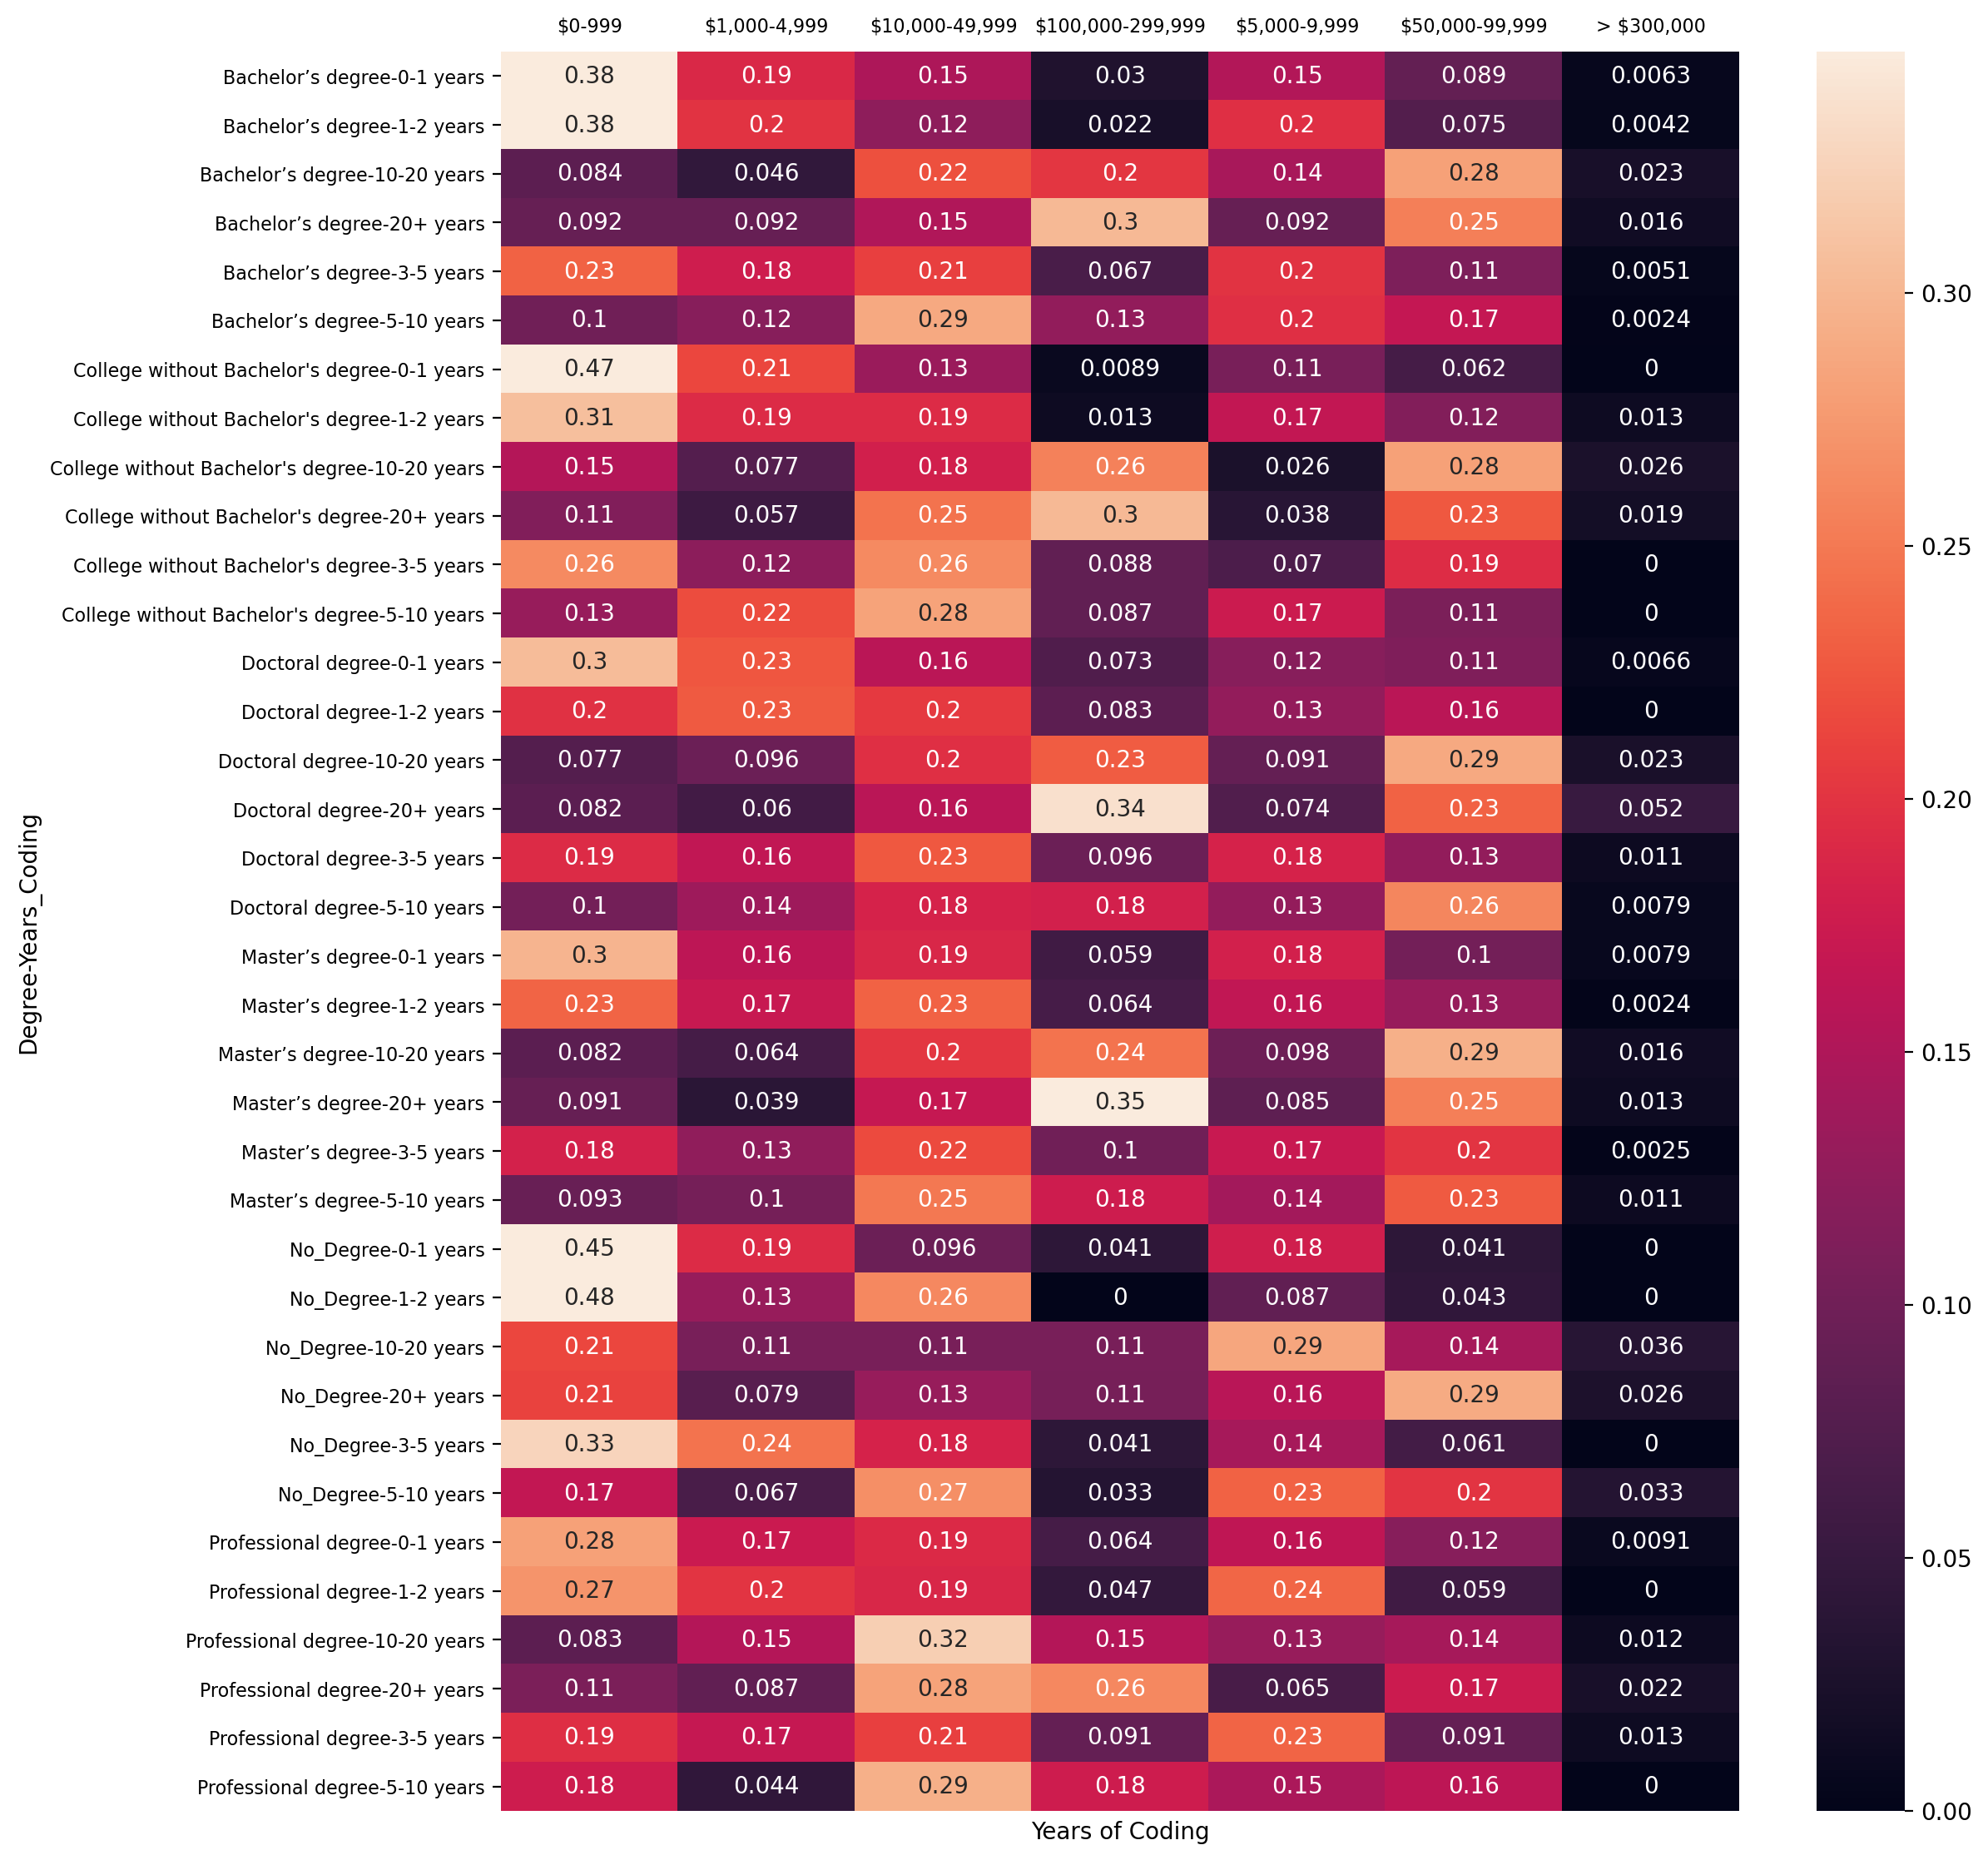

In [78]:
plt.figure(figsize = (12,14), dpi = 200)
ax = sns.heatmap(dc, annot = True, robust=True)
ax.set(xlabel = 'Years of Coding');
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, labeltop=True);

In [79]:
#This heatmap shows the degree Kagglers have along with how much money they are making and how many years they have been coding
#for. Adding up the rows gives you 100%

#The heatmap clearly shows that the higher degree and more years of experience with coding, the more money a Kaggler will earn. 

#Some observations I have come up with are:

#Kagglers with Doctoral degrees have barely anyone with 0-1 or 1-2 years of coding experience making over $300,000, however, Kagglers with Masters and Bachelors still have multiple people making $300,000 with 0-1 or 1-2 years of coding experience

#Nearly 57% of kagglers with Bacheors degrees and 0-1 year of coding experience earn less than $5000, 46% of Kagglers with a Masters degree and 0-1 years of coding experience earn less than $5000, and 52% of Kagglers with a Doctorate degree and 0-1 years of coding experience earn less than $5000. These are fairly surprising numbers which could due fairly low standards of living in countries, it's still concerning that people with such high degreees and in a field that high in demand would earn that little money. In fact kagglers with Professional Degreesand 0-1 year of coding experience have the lowest percentage of all the degrees with 45% earning between 0  - $5000.


In [80]:
cyg.groupby(['Gender', 'Years_Coding']).sum()

$0-999  $1,000-4,999  $10,000-49,999  $100,000-299,999  \
Gender Years_Coding                                                           
Man    0-1 years      467.0         264.0           247.0              73.0   
       1-2 years      420.0         291.0           289.0              69.0   
       10-20 years    106.0          90.0           277.0             286.0   
       20+ years       88.0          56.0           179.0             341.0   
       3-5 years      384.0         284.0           452.0             175.0   
       5-10 years     141.0         170.0           399.0             260.0   
Other  0-1 years        8.0           5.0             3.0               1.0   
       1-2 years       11.0           4.0             5.0               1.0   
       10-20 years      4.0           3.0             4.0               9.0   
       20+ years        5.0           0.0             2.0              10.0   
       3-5 years        4.0           7.0             4.0               4.0   
       5-10 years       5.0           4.0             7.0               6.0   
Woman  0-1 years      158.0          66.0            55.0              12.0   
       1-2 years      135.0          61.0            63.0              16.0   
       10-20 years     17.0          20.0            28.0              40.0   
       20+ years       15.0          11.0            14.0              20.0   
       3-5 years      113.0          76.0            69.0              34.0   
       5-10 years      47.0          42.0            64.0              41.0   

                     $5,000-9,999  $50,000-99,999  > $300,000  
Gender Years_Coding                                            
Man    0-1 years            233.0           137.0        10.0  
       1-2 years            277.0           162.0         5.0  
       10-20 years          138.0           375.0        25.0  
       20+ years             88.0           262.0        28.0  
       3-5 years            378.0           320.0        10.0  
       5-10 years           248.0           355.0        13.0  
Other  0-1 years              4.0             2.0         1.0  
       1-2 years              5.0             2.0         0.0  
       10-20 years            0.0             9.0         2.0  
       20+ years              0.0             5.0         2.0  
       3-5 years              6.0             7.0         0.0  
       5-10 years             1.0            12.0         0.0  
Woman  0-1 years             59.0            36.0         1.0  
       1-2 years             53.0            38.0         1.0  
       10-20 years           22.0            31.0         2.0  
       20+ years              6.0            13.0         1.0  
       3-5 years             59.0            57.0         1.0  
       5-10 years            41.0            42.0         3.0

In [81]:
cg = cyg.groupby(['Gender', 'Years_Coding']).mean()
cg

$0-999  $1,000-4,999  $10,000-49,999  $100,000-299,999  \
Gender Years_Coding                                                             
Man    0-1 years     0.326345      0.184486        0.172607          0.051013   
       1-2 years     0.277594      0.192333        0.191011          0.045605   
       10-20 years   0.081727      0.069391        0.213570          0.220509   
       20+ years     0.084453      0.053743        0.171785          0.327255   
       3-5 years     0.191712      0.141787        0.225662          0.087369   
       5-10 years    0.088903      0.107188        0.251576          0.163934   
Other  0-1 years     0.333333      0.208333        0.125000          0.041667   
       1-2 years     0.392857      0.142857        0.178571          0.035714   
       10-20 years   0.129032      0.096774        0.129032          0.290323   
       20+ years     0.208333      0.000000        0.083333          0.416667   
       3-5 years     0.125000      0.218750        0.125000          0.125000   
       5-10 years    0.142857      0.114286        0.200000          0.171429   
Woman  0-1 years     0.408269      0.170543        0.142119          0.031008   
       1-2 years     0.367847      0.166213        0.171662          0.043597   
       10-20 years   0.106250      0.125000        0.175000          0.250000   
       20+ years     0.187500      0.137500        0.175000          0.250000   
       3-5 years     0.276284      0.185819        0.168704          0.083130   
       5-10 years    0.167857      0.150000        0.228571          0.146429   

                     $5,000-9,999  $50,000-99,999  > $300,000  
Gender Years_Coding                                            
Man    0-1 years         0.162823        0.095737    0.006988  
       1-2 years         0.183080        0.107072    0.003305  
       10-20 years       0.106399        0.289129    0.019275  
       20+ years         0.084453        0.251440    0.026871  
       3-5 years         0.188717        0.159760    0.004993  
       5-10 years        0.156368        0.223834    0.008197  
Other  0-1 years         0.166667        0.083333    0.041667  
       1-2 years         0.178571        0.071429    0.000000  
       10-20 years       0.000000        0.290323    0.064516  
       20+ years         0.000000        0.208333    0.083333  
       3-5 years         0.187500        0.218750    0.000000  
       5-10 years        0.028571        0.342857    0.000000  
Woman  0-1 years         0.152455        0.093023    0.002584  
       1-2 years         0.144414        0.103542    0.002725  
       10-20 years       0.137500        0.193750    0.012500  
       20+ years         0.075000        0.162500    0.012500  
       3-5 years         0.144254        0.139364    0.002445  
       5-10 years        0.146429        0.150000    0.010714

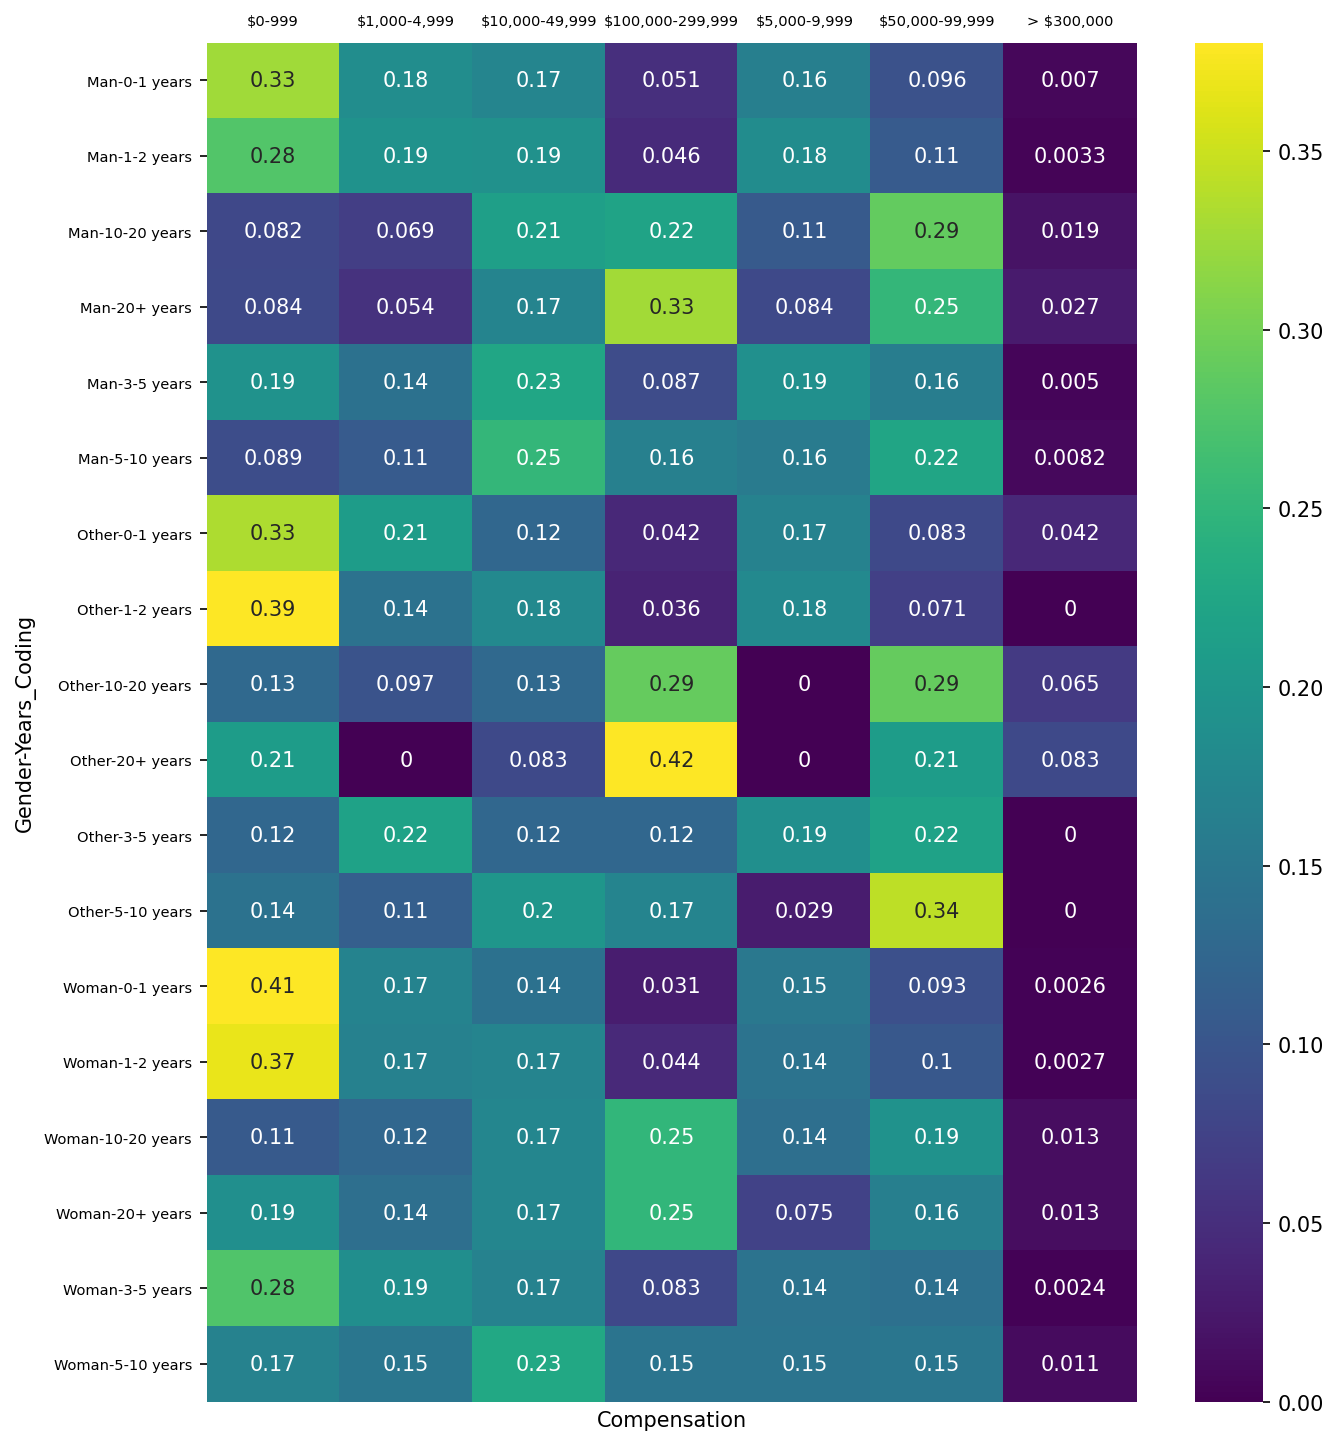

In [82]:
plt.figure(figsize=(10,12), dpi = 150)
ax = sns.heatmap(cg, annot = True, robust = True, cmap = 'viridis')
ax.set(xlabel = 'Compensation');
plt.tick_params(axis='both', which='major', labelsize=7, labelbottom = False, bottom=False, top = False, labeltop=True);

In [83]:
#Again adding every row will lead you to 100%

#In all genders, however, there are still a some people that have only coded for a few years but are earning 6 figure salaries, so I am assuming (like that for the degree) they actually have others jobs and are just doing coding on the side or just lied

#For Woman with 20+ years of coding experience, 31% of them make less than $5000 where on the other hand only 14% of Men with more than 20+ years of experience make less than $5000

#As the salary range increases especially for those between 50k - 100k and those between 100k - 300k, the percentage of woman making these compensations is 1/3 less than that of men
